In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot
from IPython.display import display

In [144]:
%matplotlib inline
%config InlineBackend.figure_format="retina"

plt.rcParams["figure.figsize"]=(20, 20)
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

In [145]:
data = pd.read_csv("query_result_2019-12-24T07_29_06.659397Z.csv")

In [146]:
data.head()

Time End          Time End Local Tz  Time Offset  \
0  2019-05-05T09:40:00+03:00  2019-05-05T12:40:00+03:00        10800   
1  2019-05-05T11:13:29+03:00  2019-05-05T14:13:29+03:00        10800   
2  2019-05-05T12:07:42+03:00  2019-05-05T15:07:42+03:00        10800   
3  2019-05-05T13:04:05+03:00  2019-05-05T16:04:05+03:00        10800   
4  2019-05-05T13:18:18+03:00  2019-05-05T16:18:18+03:00        10800   

                  Time Start        Time Start Local Tz  User ID  Value  
0  2019-05-05T09:39:59+03:00  2019-05-05T12:39:59+03:00     2166    1.0  
1  2019-05-05T11:12:51+03:00  2019-05-05T14:12:51+03:00     2166   34.0  
2  2019-05-05T12:07:39+03:00  2019-05-05T15:07:39+03:00     2166    1.0  
3  2019-05-05T13:04:02+03:00  2019-05-05T16:04:02+03:00     2166    3.0  
4  2019-05-05T13:18:13+03:00  2019-05-05T16:18:13+03:00     2166    6.0

In [147]:
# Primary data mining
#
# 1. Really single user data (UserID the same in each line)
# 2. Time offset in 2 or 3 hour between Time_Start_Local_Tz and Time_Start,
#    Time_End_Local_Tz and Time_End and in column Time Offset are the same
# 3. The reason for logging these time shifts is not clear, but it is clear,
#    that this information is needless and does not affect the value of the target variable
# 4. Because 3, focus our attention on the pair Time_Start, Time_End,
#    If necessary, use the time with a shift, change to Time_Start_Local_Tz and Time_End_Local_Tz  

In [148]:
# Convert to datetime format
data['Time_Start'] = pd.to_datetime(data['Time Start'])
data['Time_End']   = pd.to_datetime(data['Time End'])
data['Time_Delta'] = (data['Time_End']-data['Time_Start']).dt.total_seconds()

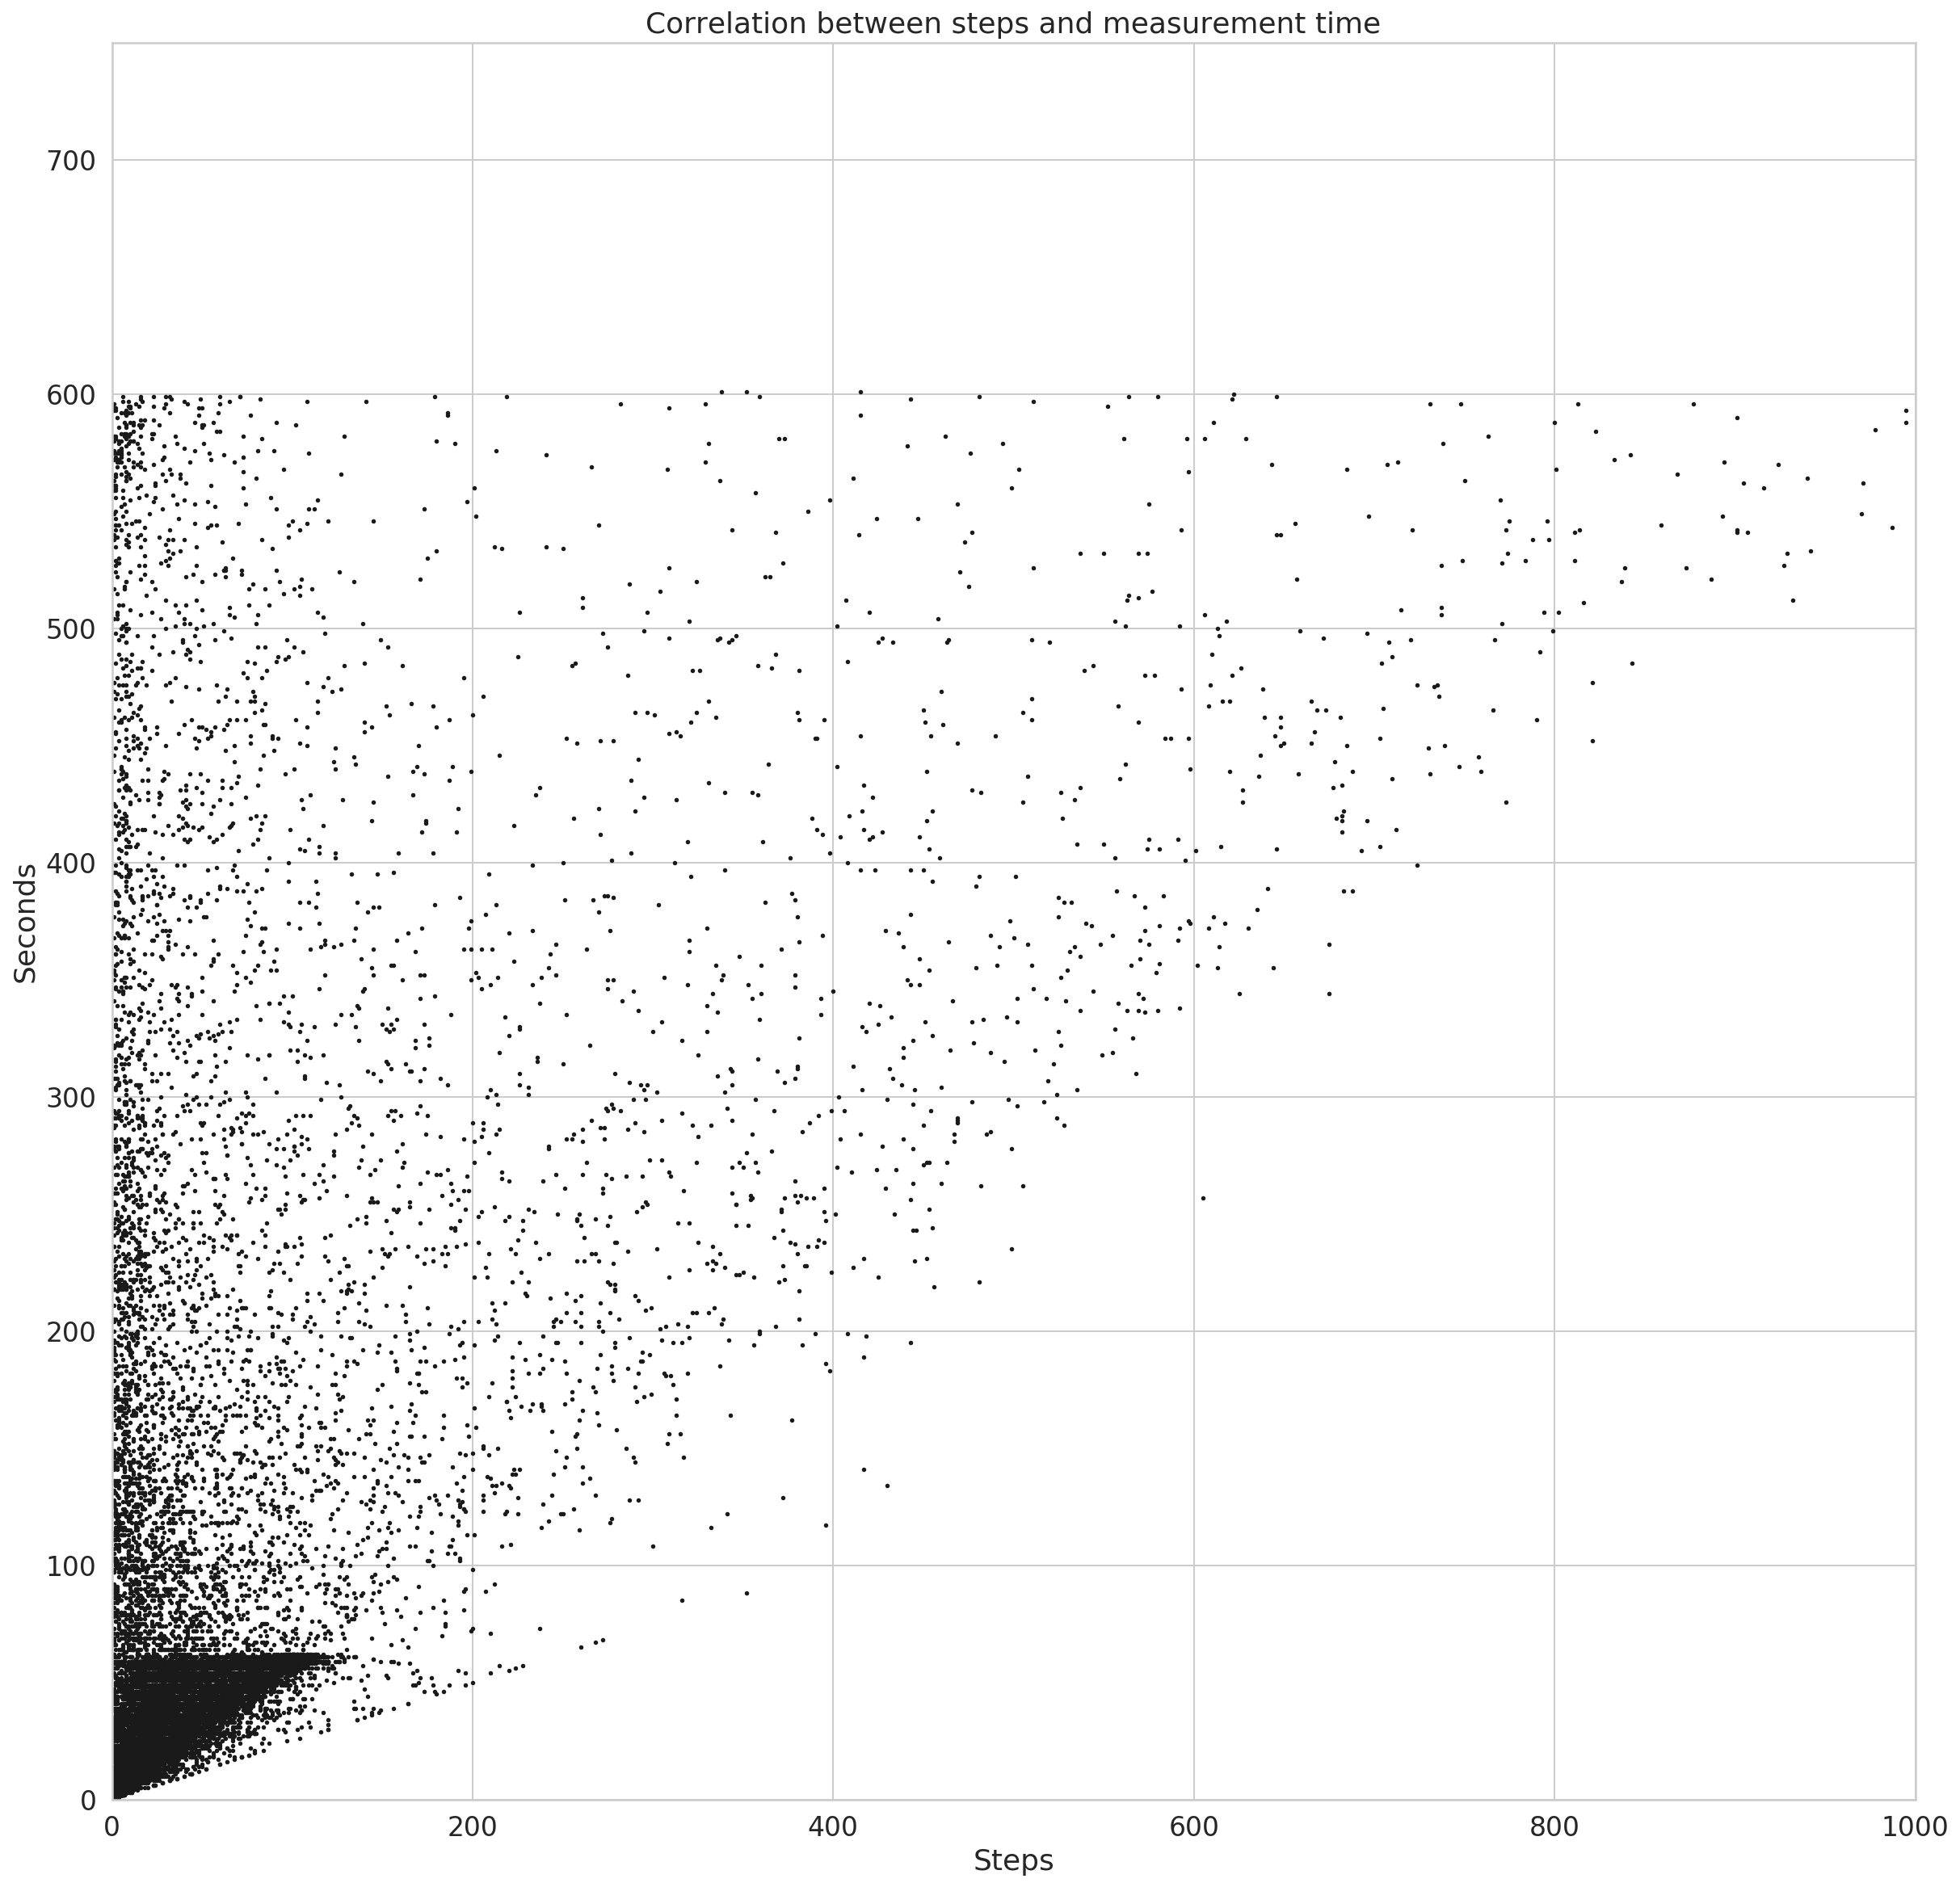

In [149]:
# Draw correlation between steps and measurement time exept outliers
plt.scatter(data['Value'], data['Time_Delta'], s = 3, c='k')
plt.title('Correlation between steps and measurement time')
plt.xlim([0,1000])
plt.ylim([0,750])
plt.xlabel('Steps')
plt.ylabel('Seconds');

In [150]:
# Outliers data describe

# Every 600 seconds, the device usually completes the measurement session and starts a new 
# Those cases where Time_Delta> 600 sec - are presumably cases when there was no mobile network or 
# there was another reason to extend the session. Call them as outliers data

# Almost all of the outliers data will be available on 2019-08-04 (border = 601 sec)
# For this day the object passed with outliers data 61392 steps (41133 or 46658 meters, depending on gender) 
# Total measurement time 2019-08-04 is 85859s (23.8h), versus average 20444s (5.7h)
# Total measurement steps 2019-08-04 is 61392, versus average 15088 steps
# Average speed 2019-08-04 is 0.2-1.5 м/с 

# There are 2 possible reasons:
# 1. Meter error in values, because 40 km and 24 hours for walking is too much
# 2. Meter error in type of movement, meaning not walking
# 3. The object wandered around the forest for 24 hours

In [151]:
data[data['Time_Delta']>601]

Time End          Time End Local Tz  Time Offset  \
11425  2019-08-04T04:51:59+03:00  2019-08-04T07:51:59+03:00        10800   
11426  2019-08-04T07:34:01+03:00  2019-08-04T10:34:01+03:00        10800   
11428  2019-08-04T07:57:29+03:00  2019-08-04T10:57:29+03:00        10800   
11430  2019-08-04T08:32:13+03:00  2019-08-04T11:32:13+03:00        10800   
11432  2019-08-04T10:10:24+03:00  2019-08-04T13:10:24+03:00        10800   
11433  2019-08-04T10:44:54+03:00  2019-08-04T13:44:54+03:00        10800   
11435  2019-08-04T14:09:21+03:00  2019-08-04T17:09:21+03:00        10800   
11437  2019-08-04T15:50:05+03:00  2019-08-04T18:50:05+03:00        10800   
11440  2019-08-04T16:57:27+03:00  2019-08-04T19:57:27+03:00        10800   
11535  2019-08-04T19:40:00+03:00  2019-08-04T22:40:00+03:00        10800   
11538  2019-08-04T23:45:46+03:00  2019-08-05T02:45:46+03:00        10800   
34707  2019-08-04T16:29:01+03:00  2019-08-04T19:29:01+03:00        10800   

                      Time Start        Time Start Local Tz  User ID    Value  \
11425  2019-08-04T00:23:56+03:00  2019-08-04T03:23:56+03:00     2166   4165.0   
11426  2019-08-04T04:52:02+03:00  2019-08-04T07:52:02+03:00     2166   2754.0   
11428  2019-08-04T07:36:06+03:00  2019-08-04T10:36:06+03:00     2166   1360.0   
11430  2019-08-04T07:57:44+03:00  2019-08-04T10:57:44+03:00     2166   2027.0   
11432  2019-08-04T08:40:20+03:00  2019-08-04T11:40:20+03:00     2166   2651.0   
11433  2019-08-04T10:10:26+03:00  2019-08-04T13:10:26+03:00     2166   2769.0   
11435  2019-08-04T10:44:59+03:00  2019-08-04T13:44:59+03:00     2166  10994.0   
11437  2019-08-04T14:15:43+03:00  2019-08-04T17:15:43+03:00     2166   2045.0   
11440  2019-08-04T16:29:26+03:00  2019-08-04T19:29:26+03:00     2166   1112.0   
11535  2019-08-04T18:32:37+03:00  2019-08-04T21:32:37+03:00     2166   8532.0   
11538  2019-08-04T19:40:05+03:00  2019-08-04T22:40:05+03:00     2166  13508.0   
34707  2019-08-04T15:50:07+03:00  2019-08-04T18:50:07+03:00     2166   1685.0   

                     Time_Start                  Time_End  Time_Delta  
11425 2019-08-04 00:23:56+03:00 2019-08-04 04:51:59+03:00     16083.0  
11426 2019-08-04 04:52:02+03:00 2019-08-04 07:34:01+03:00      9719.0  
11428 2019-08-04 07:36:06+03:00 2019-08-04 07:57:29+03:00      1283.0  
11430 2019-08-04 07:57:44+03:00 2019-08-04 08:32:13+03:00      2069.0  
11432 2019-08-04 08:40:20+03:00 2019-08-04 10:10:24+03:00      5404.0  
11433 2019-08-04 10:10:26+03:00 2019-08-04 10:44:54+03:00      2068.0  
11435 2019-08-04 10:44:59+03:00 2019-08-04 14:09:21+03:00     12262.0  
11437 2019-08-04 14:15:43+03:00 2019-08-04 15:50:05+03:00      5662.0  
11440 2019-08-04 16:29:26+03:00 2019-08-04 16:57:27+03:00      1681.0  
11535 2019-08-04 18:32:37+03:00 2019-08-04 19:40:00+03:00      4043.0  
11538 2019-08-04 19:40:05+03:00 2019-08-04 23:45:46+03:00     14741.0  
34707 2019-08-04 15:50:07+03:00 2019-08-04 16:29:01+03:00      2334.0

In [152]:
def step_counter(dataframe, exclude_outliers, replace_empty_mean, draw):    
    
    """
    function step_counter
    
    Convert input data to datetime format, process outliers data,
    transform input data to data with sum values by days and process empty data.

    Args:
        dataframe          (dataframe): Input data.
        exclude_outliers   (bool):      True - exclude outliers from data,    False - leave the data unchanged.
        replace_empty_mean (bool):      True - replace empty data mean value, False - replace empty data 0.0 value
        draw               (bool):      True - show information,              False - hide information.

    Returns:
        steps               (series):    Counted setps value by days data.
        outliers_data       (dataframe): Outliers data.
        eampty_days         (series):    Eampty data (day and replace value).  
    """
    
    dataframe.loc[:,'Time_Start'] = pd.to_datetime(dataframe['Time Start'])
    dataframe.loc[:,'Time_End']   = pd.to_datetime(dataframe['Time End'])
    dataframe.loc[:,'Time_Delta'] = (dataframe['Time_End']-dataframe['Time_Start']).dt.total_seconds()
    
    dataframe.loc[:,'Date'] = [i.date() for i in dataframe['Time_Start']] # convert to days
    
    old_len_dataframe = len(dataframe)
    
    if exclude_outliers:
        outliers_data = dataframe.query('Time_Delta>601') # you can change the limit value for outliers data here 
        dataframe     = dataframe.query('Time_Delta<601') # and here
        
        if draw:
            print('Remove from data outliers data in count = ', old_len_dataframe-len(dataframe), ' records')
            print('New lenght data =', len(dataframe))
        
    else:
        outliers_data = np.NaN
        
        if draw:
            print('Lenght data did not change =', len(dataframe))  
    
    steps = dataframe.groupby('Date')['Value'].aggregate(sum)
    steps.index = [pd.Timestamp(i) for i in steps.index]
    
    old_len_steps = len(steps)
    idx = pd.date_range(steps.index[0], steps.index[-1])    # you should change interval 
                                                            # if count empty days will change
    
    if replace_empty_mean:
        steps_val_copy = steps.values
        steps = steps.reindex(idx, fill_value=steps.mean()) # you can change replase value for empty data here
        eampty_days = steps[steps == steps_val_copy.mean()] # and here
        
        if draw:
            print('Replace empty days mean =', steps.mean(),'in', len(steps)-old_len_steps, ' day(s) in set')
            print('New lenght set = ', len(steps))
        
    else:
        steps = steps.reindex(idx, fill_value=0)            # you can change replase value for empty data here
        eampty_days = steps[steps == 0.0]                   # and here
        
        if draw:
            print('Replace empty days 0 in', len(steps)-old_len_steps, ' day(s) in set')
            print('New lenght set = ', len(steps))     
    
    return steps, outliers_data, eampty_days

In [153]:
def norm_compare_self_and_diff(series, draw): 
    
    """
    function norm_compare_self_and_diff
    
    Calculate first discrete difference of object, check which distribution is more normal and
    draw normal test for both distributions
    
    Args:
        series  (dataframe): Counted setps value by days data.
        draw    (bool):      True - draw graphics, False - hide graphics.

    Returns:
                (series):    More like normal series (real or first discrete difference).
        flag    (str):       Name of selected distribution: 'norm' or 'diff'.
    """

    diff_1 = series.diff(periods=1)
    diff_1[0] = (diff_1[1] + diff_1[2])/2                                        # you should change interval
                                                                                 # if diff periods will change
    
    norm_distr_step   = pd.Series(np.random.normal(loc = series.mean(),
                                                 scale = np.std(series),
                                                  size = len(series)*100))
    
    norm_distr_diff_1 = pd.Series(np.random.normal(loc = diff_1.mean(),
                                                 scale = np.std(diff_1),
                                                  size = len(diff_1)*100))    
    
    p_value_norm         = (stats.shapiro(series)[1] + normaltest(series)[1])/2  # here you can choose another 
    p_value_diff_1_norm  = (stats.shapiro(diff_1)[1] + normaltest(diff_1)[1])/2  # distribution normality tests.
    

    if draw:
        
        print('p_value_norm =       ', p_value_norm) 
        print('p_value_diff_1_norm =', p_value_diff_1_norm)
        
        sns.set_context("notebook", font_scale=1.0)

        fig, axs = plt.subplots(4, 2, figsize=(16, 32))
        plt.subplots_adjust(wspace=0.2, hspace=0.4)
 
        series.            plot(              color='k',        linewidth=4,                     ax=axs[0, 0])
        diff_1.            plot(              color='green',    linewidth=4,                     ax=axs[0, 1])
        qqplot(            series,            color='k',             line='s',                   ax=axs[1, 0])
        qqplot(            diff_1,            color='green',         line='s',                   ax=axs[1, 1])
        qqplot(            norm_distr_step,   color='hotpink',       line='s',                   ax=axs[2, 0])
        qqplot(            norm_distr_diff_1, color='c',             line='s',                   ax=axs[2, 1])
        series.            hist(              color='k',             bins=30,                    ax=axs[3, 0])
        norm_distr_step.   plot.kde(          color='hotpink',  linewidth=4, secondary_y=True,   ax=axs[3, 0])
        diff_1.            hist(              color='green',         bins=30,                    ax=axs[3, 1])
        norm_distr_diff_1. plot.kde(          color='c',        linewidth=4, secondary_y=True,   ax=axs[3, 1])

        axs[0, 0].set_title('Steps every day')
        axs[0, 1].set_title('First differences of the series')
        axs[1, 0].set_title('Quantile-quantile plot for steps')
        axs[1, 1].set_title('Quantile-quantile plot for first differences')
        axs[2, 0].set_title('Quantile-quantile plot for kde normal distribution')
        axs[2, 1].set_title('Quantile-quantile plot for kde normal distribution')
        axs[3, 0].set_title('Histogram of steps and kde normal distribution')
        axs[3, 1].set_title('Histogram of first differences of thes series and kde normal distribution')
        
        sns.set_context("notebook", font_scale=1.5)
        
    if p_value_norm > p_value_diff_1_norm:
        
        flag = 'norm'
        
        if draw:
            print('Select real data values')
        
        return series, flag
    
    else:
        
        flag = 'diff'
        
        if draw:
            print('Select first differences of the series')
        
        df = series.to_frame()
        df['diff_1'] = diff_1
        
        return df['diff_1'], flag

In [154]:
def rolling_maker(series, period):
    
    """
    function rolling_maker
    
    Calculate moving average, replace missing values first moving average value.
    
    Args:
        series    (series): Counted setps value by days data or first discrete difference it.
        period    (int):    Length of rolling window.

    Returns:
                  (series): Moving average (rolling avearage) series.
    """
    
    mean_roling_period_days = series.rolling(period).mean().dropna()
    
    len_start_series = len(series)-len(mean_roling_period_days)
    start_series = pd.Series(index = series.index[:len_start_series],
                              data = [mean_roling_period_days[0]]*len_start_series)

    return pd.concat([mean_roling_period_days, start_series], axis=0).\
                      sort_index()

In [155]:
def average_maker(series, period):
    
    """
    function average_maker
    
    Calculate average values for last period days, restore data between periods with linear growth 
    to the next average value, replace last value if not known
    
    Args:
        series    (series): Counted setps value by days data or first discrete difference it.
        period    (int):    Length of period to calculate average.

    Returns:
                  (series): Averege series with restore data between averege values.
    """
    
    period_str = str(period)+'D'
    
    average_last_period_days = series.resample(period_str).mean()
    
    restored_average_last_period_days = {}

    for i in range(len(average_last_period_days)-1):   
        days = pd.date_range(average_last_period_days.index[i]+pd.Timedelta(days=1), periods=(period-1))
        step = (average_last_period_days[i+1] - average_last_period_days[i])/period
        values = [(average_last_period_days[i] + (j+1)*step) for j in range(len(days))]

        restored_average_last_period_days.update(dict(zip(days, values)))
    
    if (len(restored_average_last_period_days)+len(average_last_period_days)) != len(series):
        restored_average_last_period_days[series.index[-1]]=average_last_period_days[-1]

    return pd.concat([average_last_period_days,\
                      pd.Series(restored_average_last_period_days)], axis=0).\
                      sort_index()

In [156]:
def base_maker(series, flag, draw):
    
    """
    function base_maker
    
    Make moving average and average base lines (these are just different ways to smooth out function values)
    and drow base lines with different periods and smoothing types.
    
    Args:
        series  (series):    Counted setps value by days data or first discrete difference it.
        flag    (str):       Name of selected distribution: 'norm' or 'diff'.
        draw    (bool):      True - draw graphics, False - hide graphics.

    Returns:
        df      (dataframe): Real/first discrete difference data with base lines.
    """
    
    # create your base line!
    
    roll_2 = rolling_maker(series, 2)
    roll_3 = rolling_maker(series, 3)
    roll_7 = rolling_maker(series, 7)
    avar_2 = average_maker(series, 2)
    avar_3 = average_maker(series, 3)
    avar_7 = average_maker(series, 7)

    df           = series.to_frame()    
    df['mean']   = series.mean()
    df['roll_2'] = roll_2
    df['roll_3'] = roll_3
    df['roll_7'] = roll_7
    df['avar_2'] = avar_2
    df['avar_3'] = avar_3
    df['avar_7'] = avar_7
    
    if draw:
        
        if flag is 'diff':
            base_color = 'green'
        else:
            base_color = 'k'
        
        fig, (ax1, ax2) = plt.subplots(2,1)
        
        ax1.plot(df[df.columns[0]], color=base_color,   linewidth=2, label='steps every day')
        ax1.plot(df['mean'],        color='gold' ,      linewidth=4, label='mean all days')
        ax1.plot(df['avar_2'],      color='tab:red',    linewidth=4, label='mean average 2 day')
        ax1.plot(df['avar_7'],      color='tab:orange', linewidth=4, label='mean average 7 day')       
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Value')
        ax1.set_title ('Steps by day, mean and averange bases')
        ax1.legend()
        
        ax2.plot(df[df.columns[0]], color=base_color,   linewidth=2, label='steps every day')
        ax2.plot(df['mean'],        color='gold' ,      linewidth=4, label='mean all days')
        ax2.plot(df['roll_2'],      color='purple',     linewidth=4, label='mean roling 2 day')
        ax2.plot(df['roll_7'],      color='violet',     linewidth=4, label='mean roling 7 day')     
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Value')
        ax2.set_title ('Steps by day, mean and rolling bases')
        ax2.legend()
        
        plt.show()
        
    return df

In [157]:
def restore_original_data(dataframe, outliers_data, empty_days, flag):
    
    """
    function restore_original_data
    
    Restore the data in the Value or diff_1 column to the original value, meaning replacing the value 
    on the day with empty data by np.NaN, the values on the day with outliers - 
    by the sum of the outlier data and normal data on that day.
        
    Args:
        dataframe     (dataframe): Real/first discrete difference data with her base lines.
        outliers_data (dataframe): Outlers data.
        empty_days    (series):    Empty data.
        flag          (str):       Name of selected distribution: 'norm' or 'diff'.
        
    Returns:
        dataframe     (dataframe): Real/first discrete difference restored data with base lines.
    
    Attention:  
        if the length of outlers or empty data is more than one day - the code needs to be changed 
        and cycles should be included to processing of this days.
    """
    
    if outliers_data is not np.nan:
        
        outlers_days =  outliers_data.groupby('Date')['Value'].aggregate(sum)
        
        if flag is 'norm':         
            dataframe['Value'][outlers_days.index.values[0]] = \
            dataframe['Value'][outlers_days.index.values[0]] + outlers_days[0]         
        
        elif flag is 'diff':
            dataframe['diff_1'][outlers_days.index.values[0]] = \
            dataframe['diff_1'][outlers_days.index.values[0]] + outlers_days[0]    
        
        else:           
            print('Call your engener')
     
    
    if flag is 'norm':
        dataframe['Value'][empty_days.index.values[0]] = np.NaN 
    
    elif flag is 'diff':
        dataframe['diff_1'][empty_days.index.values[0]] = np.NaN
        dataframe['diff_1'][empty_days.index.values[0] + pd.Timedelta('1D')] = \
        dataframe['diff_1'][empty_days.index.values[0] + pd.Timedelta('1D')] - empty_days.values[0]
    else:           
        print('Call your engener')
    
    
    return dataframe

In [158]:
def attach_borders(dataframe, draw):
    
    """
    function attach_borders
    
    Calculate interval values for each base line and percentiles, check each real or first discrete difference
    for the interval, calculate absolute error for for each base line and percentiles. 
        
    Args:
        dataframe          (dataframe): Real/first discrete difference restored data with base lines.
        draw               (bool):      True - show information, False - hide information.
        
    Returns:
        dataframe          (dataframe): Real/first discrete difference restored data with base lines and borders.
        df_absolute_errors (dataframe): Absolute errors for Interval checking.  
    """
    
    absolute_errors = {}
    
    old_data_frame_size = dataframe.shape
    old_data_frame_columns = dataframe.columns
    
    percents = [round(i*0.1, 2) for i in range(1, 10, 1)]            # you can change percentile here
    numbers_base_series = range(1,len(dataframe.columns))
    
    for percent in percents:
    
        for number_base_series in numbers_base_series:

            up_borders   = []
            down_borders = []
            flag_borders = []


            for i in range(len(dataframe)):

                down_border, up_border = \
                stats.norm.interval(alpha=percent, \
                                      loc=dataframe[dataframe.columns[number_base_series]][i], 
                                    scale=dataframe[dataframe.columns[0]].std())

                if (dataframe[dataframe.columns[0]][i] < up_border and \
                    dataframe[dataframe.columns[0]][i] > down_border):
                    flag_border = True
                    
                elif np.isnan(dataframe[dataframe.columns[0]][i]):
                    flag_border = np.NaN
                    
                else:
                    flag_border = False            

                up_borders.append(up_border)
                down_borders.append(down_border)
                flag_borders.append(flag_border)

            name_up   = dataframe.columns[number_base_series]+'_'+str(percent)[:3]+'_up'
            name_down = dataframe.columns[number_base_series]+'_'+str(percent)[:3]+'_down'
            name_flag = dataframe.columns[number_base_series]+'_'+str(percent)[:3]+'_flag'
            dataframe[name_up]   = up_borders
            dataframe[name_down] = down_borders
            dataframe[name_flag] = flag_borders
            
            absolute_errors[dataframe.columns[number_base_series]+'_'+str(percent)[:3]] = \
            round((abs(dataframe[name_flag].sum()-percent*len(dataframe))), 2)
            
    df_absolute_errors = pd.DataFrame(data = pd.Series(absolute_errors).values.\
                                     reshape(len(percents),len(numbers_base_series)),
                                     index = [i*0.1 for i in range(1, 10, 1)],
                                   columns = old_data_frame_columns[1:])
    
    if draw:        
        print('Set dataframe resize from ', old_data_frame_size, 'to ', dataframe.shape)
    
    return dataframe, df_absolute_errors

In [159]:
def describe_error(absolute_errors, draw):
    
    """
    function describe_error
    
    Choose best base line and percentile by error.
        
    Args:
        absolute_errors (dataframe): Absolute errors for Interval checking.
        draw            (bool):      True - show information, False - hide information.
        
    Returns:
        best_percentile (str):       Percentile with less error.
        best_base       (str):       Base line with less error.
    """
    
    absolute_errors.index.name = 'Percentile unusual'
    absolute_errors['best'] = absolute_errors.idxmin(axis=1)
    absolute_errors.loc['MEAN_ERROR']= absolute_errors.mean(numeric_only=True, axis=0)
    absolute_errors.loc[:,'mean_error'] = absolute_errors.mean(numeric_only=True, axis=1)
     
    best_percentile = absolute_errors['mean_error'].idxmin()
    best_base =  absolute_errors.iloc[:,0:(len(absolute_errors.columns)-2)].loc['MEAN_ERROR'].idxmin()
    
    if draw:
        print('\nAbsolute errors table:')
        display(absolute_errors)
        print('Select best percentile:', best_percentile)
        print('Select best base:',       best_base)
    
    return best_percentile, best_base

In [160]:
def classification_maker(dataframe, flag, base_name, percentile, draw):
    
    """
    function classification_maker
    
    Make dataframe with best classification rule and draw it.
        
    Args:
        dataframe       (dataframe): Real/first discrete difference restored data with base lines and borders.
        flag            (str):       Name of selected distribution: 'norm' or 'diff'.
        best_name       (str):       Base line with less error. 
        percentile      (str):       Percentile with less error.
        draw            (bool):      True - draw graphics, False - hide graphics.
        
    Returns:
                        (series):    index - data, values:
                                     True  - typical day
                                     False - unusual day
                                     NaN   - haven't data for this day
    """
    
    best_base = base_name+'_'+str(percentile)
    
    base_columns = [column for column in dataframe.columns if best_base in column]
    base_columns.append(dataframe.columns[0])
    base_columns.append(best_base[:-4])
    
    draw_df = dataframe[base_columns]
    
    if draw:
        out_points = draw_df[draw_df.columns[3]][draw_df[draw_df.columns[2]] == False]
        
        if flag is 'diff':
            base_color = 'green'
        else:
            base_color = 'k'

        fig, ax = plt.subplots()

        ax.plot(draw_df[draw_df.columns[0]],     color='deepskyblue',   linewidth=4, linestyle='--')
        ax.plot(draw_df[draw_df.columns[1]],     color='deepskyblue',   linewidth=4, linestyle='--', label ='classification rule')
        ax.plot(draw_df[draw_df.columns[3]],     color=base_color,      linewidth=4,                 label =flag)
        ax.plot(draw_df[draw_df.columns[4]],     color='royalblue',     linewidth=4,                 label ='base')  
        ax.scatter(out_points.index, out_points, color='deeppink',              s=300,  marker='s',  label ='unusual days')

        plt.legend()

    return draw_df[draw_df.columns[2]]

In [161]:
def detect_typical_days_pipeline(data, exclude_outliers, replace_empty_mean, draw):
    
    """
    function detect_typical_days_pipeline
    
    Make classification rule.
        
    Args:
        dataframe           (dataframe): Input data.
        exclude_outliers    (bool):      True - exclude outliers from data,    False - leave the data unchanged.
        replace_empty_mean  (bool):      True - replace empty data mean value, False - replace empty data 0.0 value.
        draw                (bool):      True - show information,              False - hide information.
       
    Returns:
                            (series):    index - data, values:
                                         True  - typical day
                                         False - unusual day
                                         NaN - haven't data for this day
    """
    
    steps, outliers_data, eampty_days     = step_counter               (data,\
                                                                        exclude_outliers=exclude_outliers,\
                                                                        replace_empty_mean=replace_empty_mean,                draw=draw)
    steps_variance, flag                  = norm_compare_self_and_diff (steps,                                                draw=draw)
    steps_with_base                       = base_maker                 (steps_variance,                                 flag ,draw=draw)
    restore_steps_swith_base              = restore_original_data      (steps_with_base, outliers_data, eampty_days,    flag)
    restore_steps_with_base_and_borders,\
                          absolute_errors = attach_borders             (restore_steps_swith_base,                             draw=draw)
    best_percentile, best_base            = describe_error             (absolute_errors,                                      draw=draw)
    answer                                = classification_maker       (restore_steps_with_base_and_borders,            flag,\
                                                                        base_name=best_base, percentile=best_percentile,      draw=draw)
    
    return answer

Lenght data did not change = 39671
Replace empty days 0 in 1  day(s) in set
New lenght set =  106
p_value_norm =        5.917630101220456e-12
p_value_diff_1_norm = 4.103173379338008e-09
Select first differences of the series


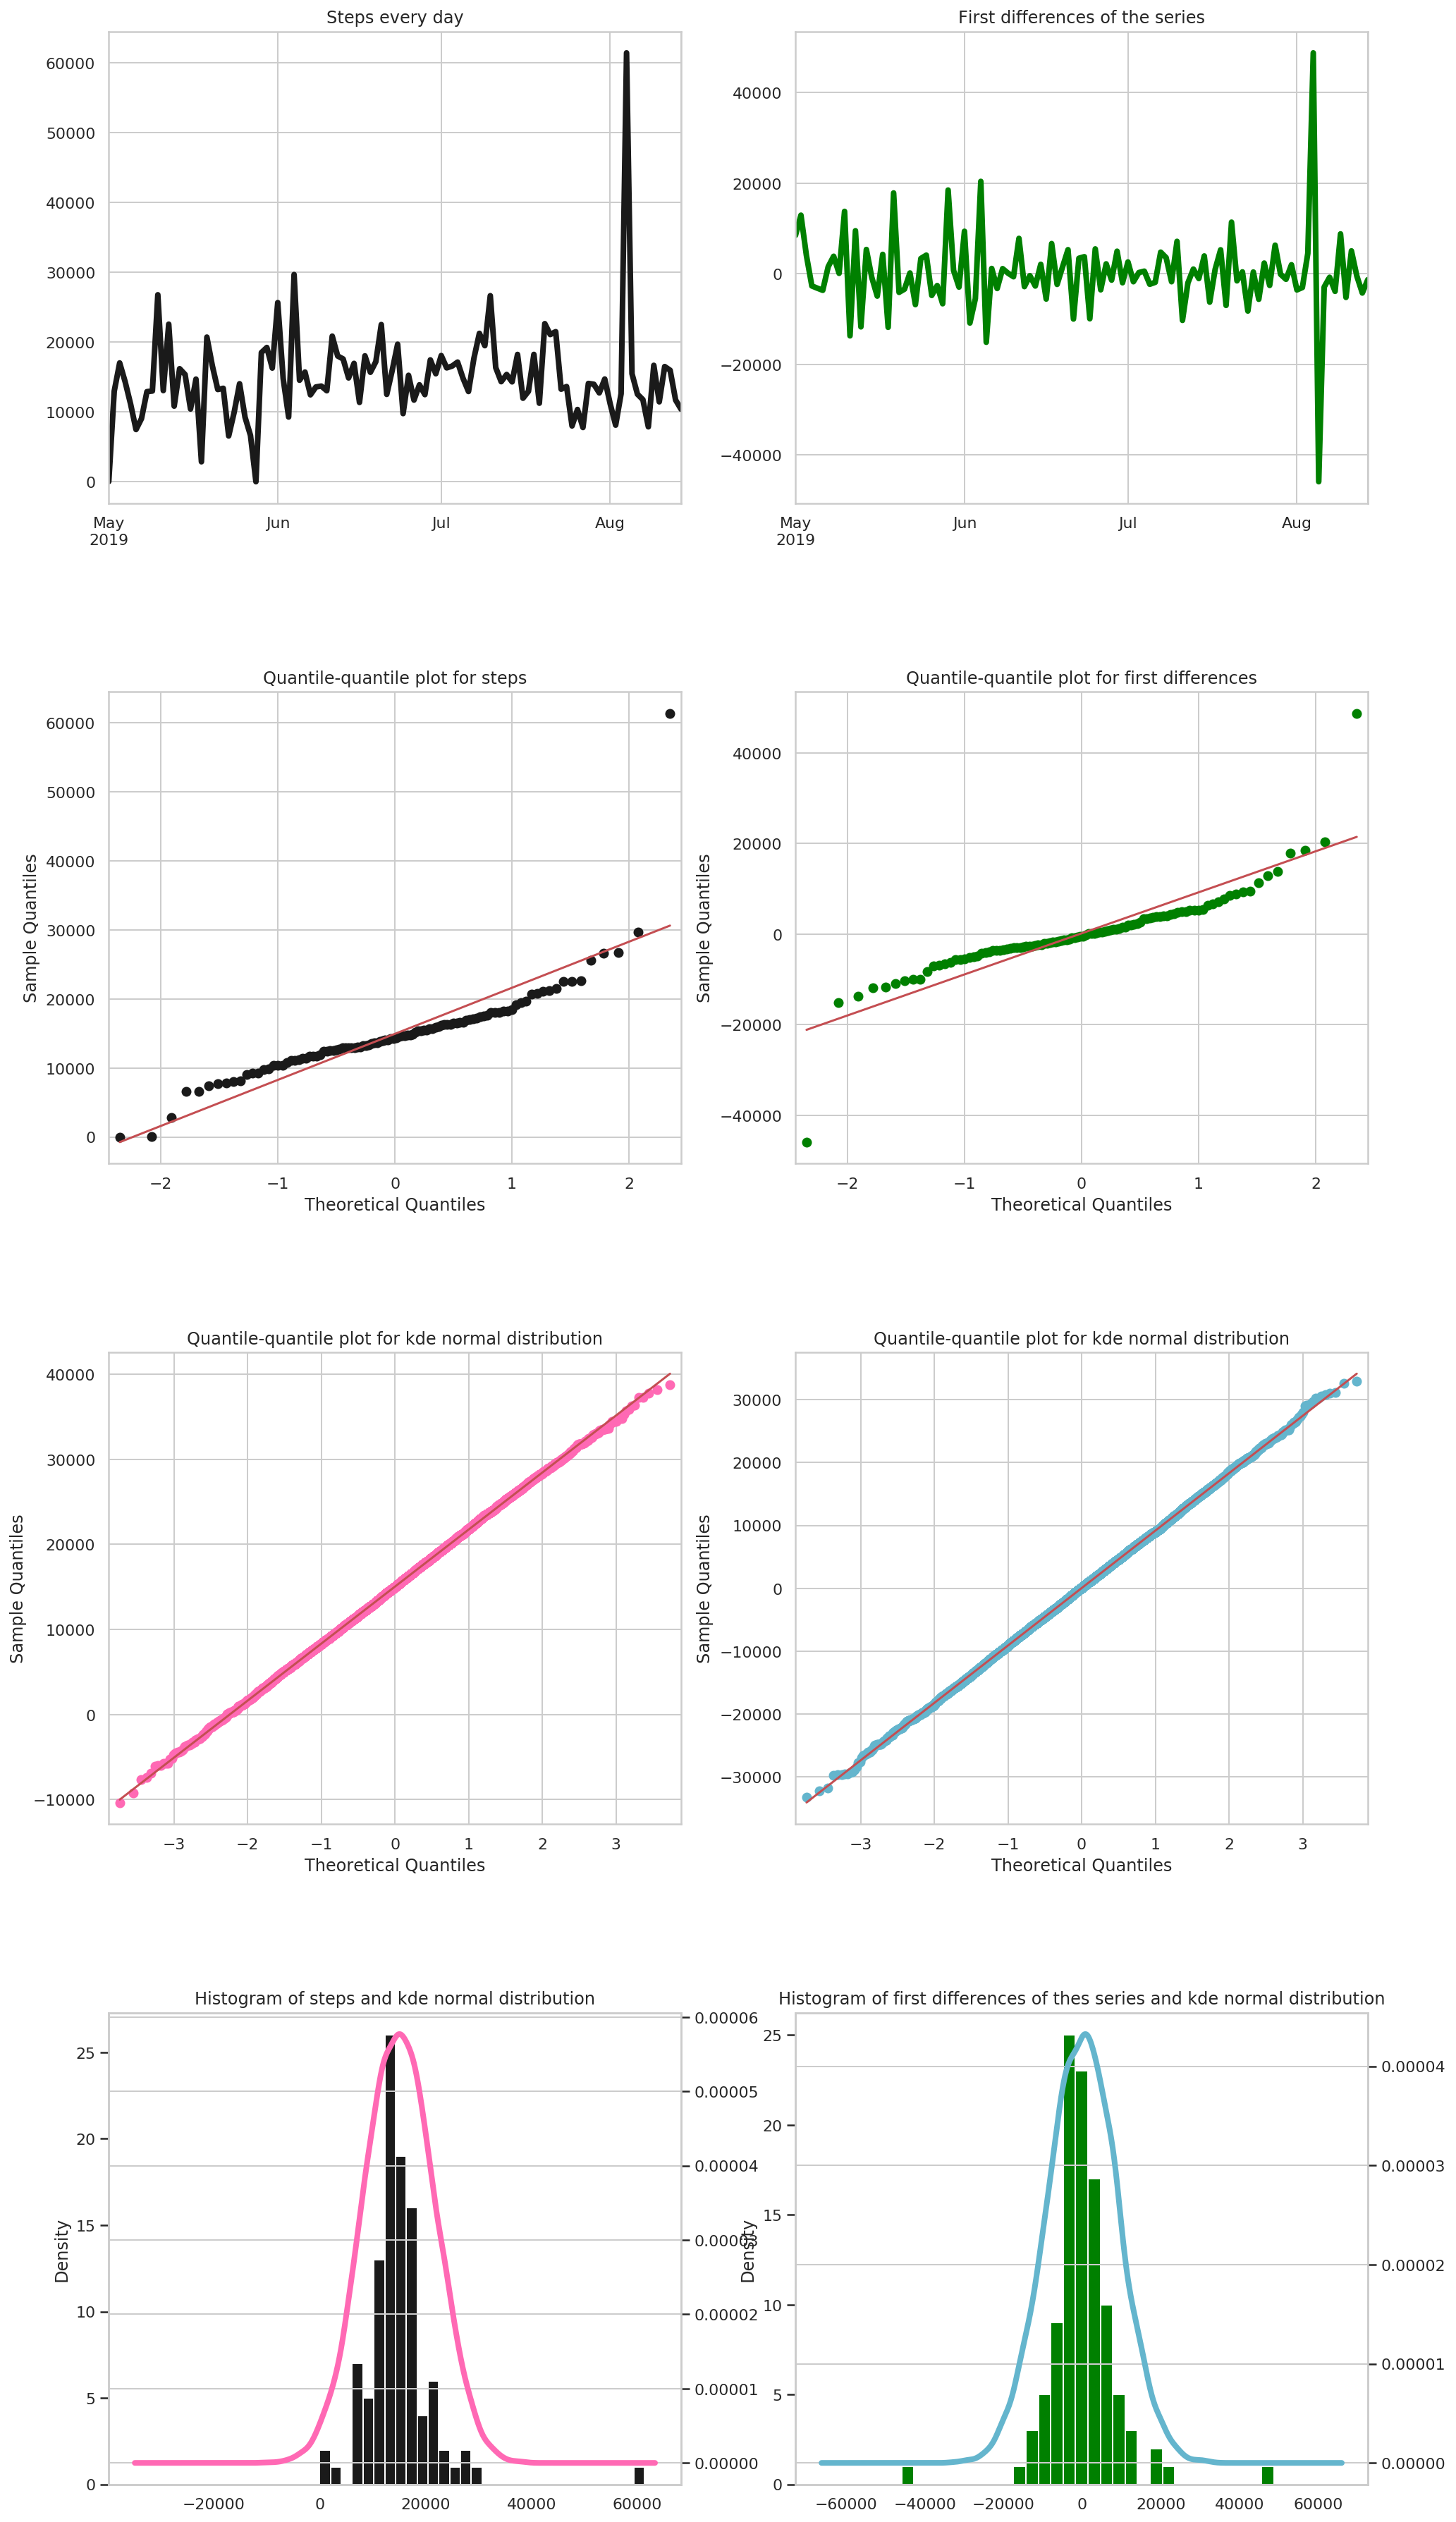

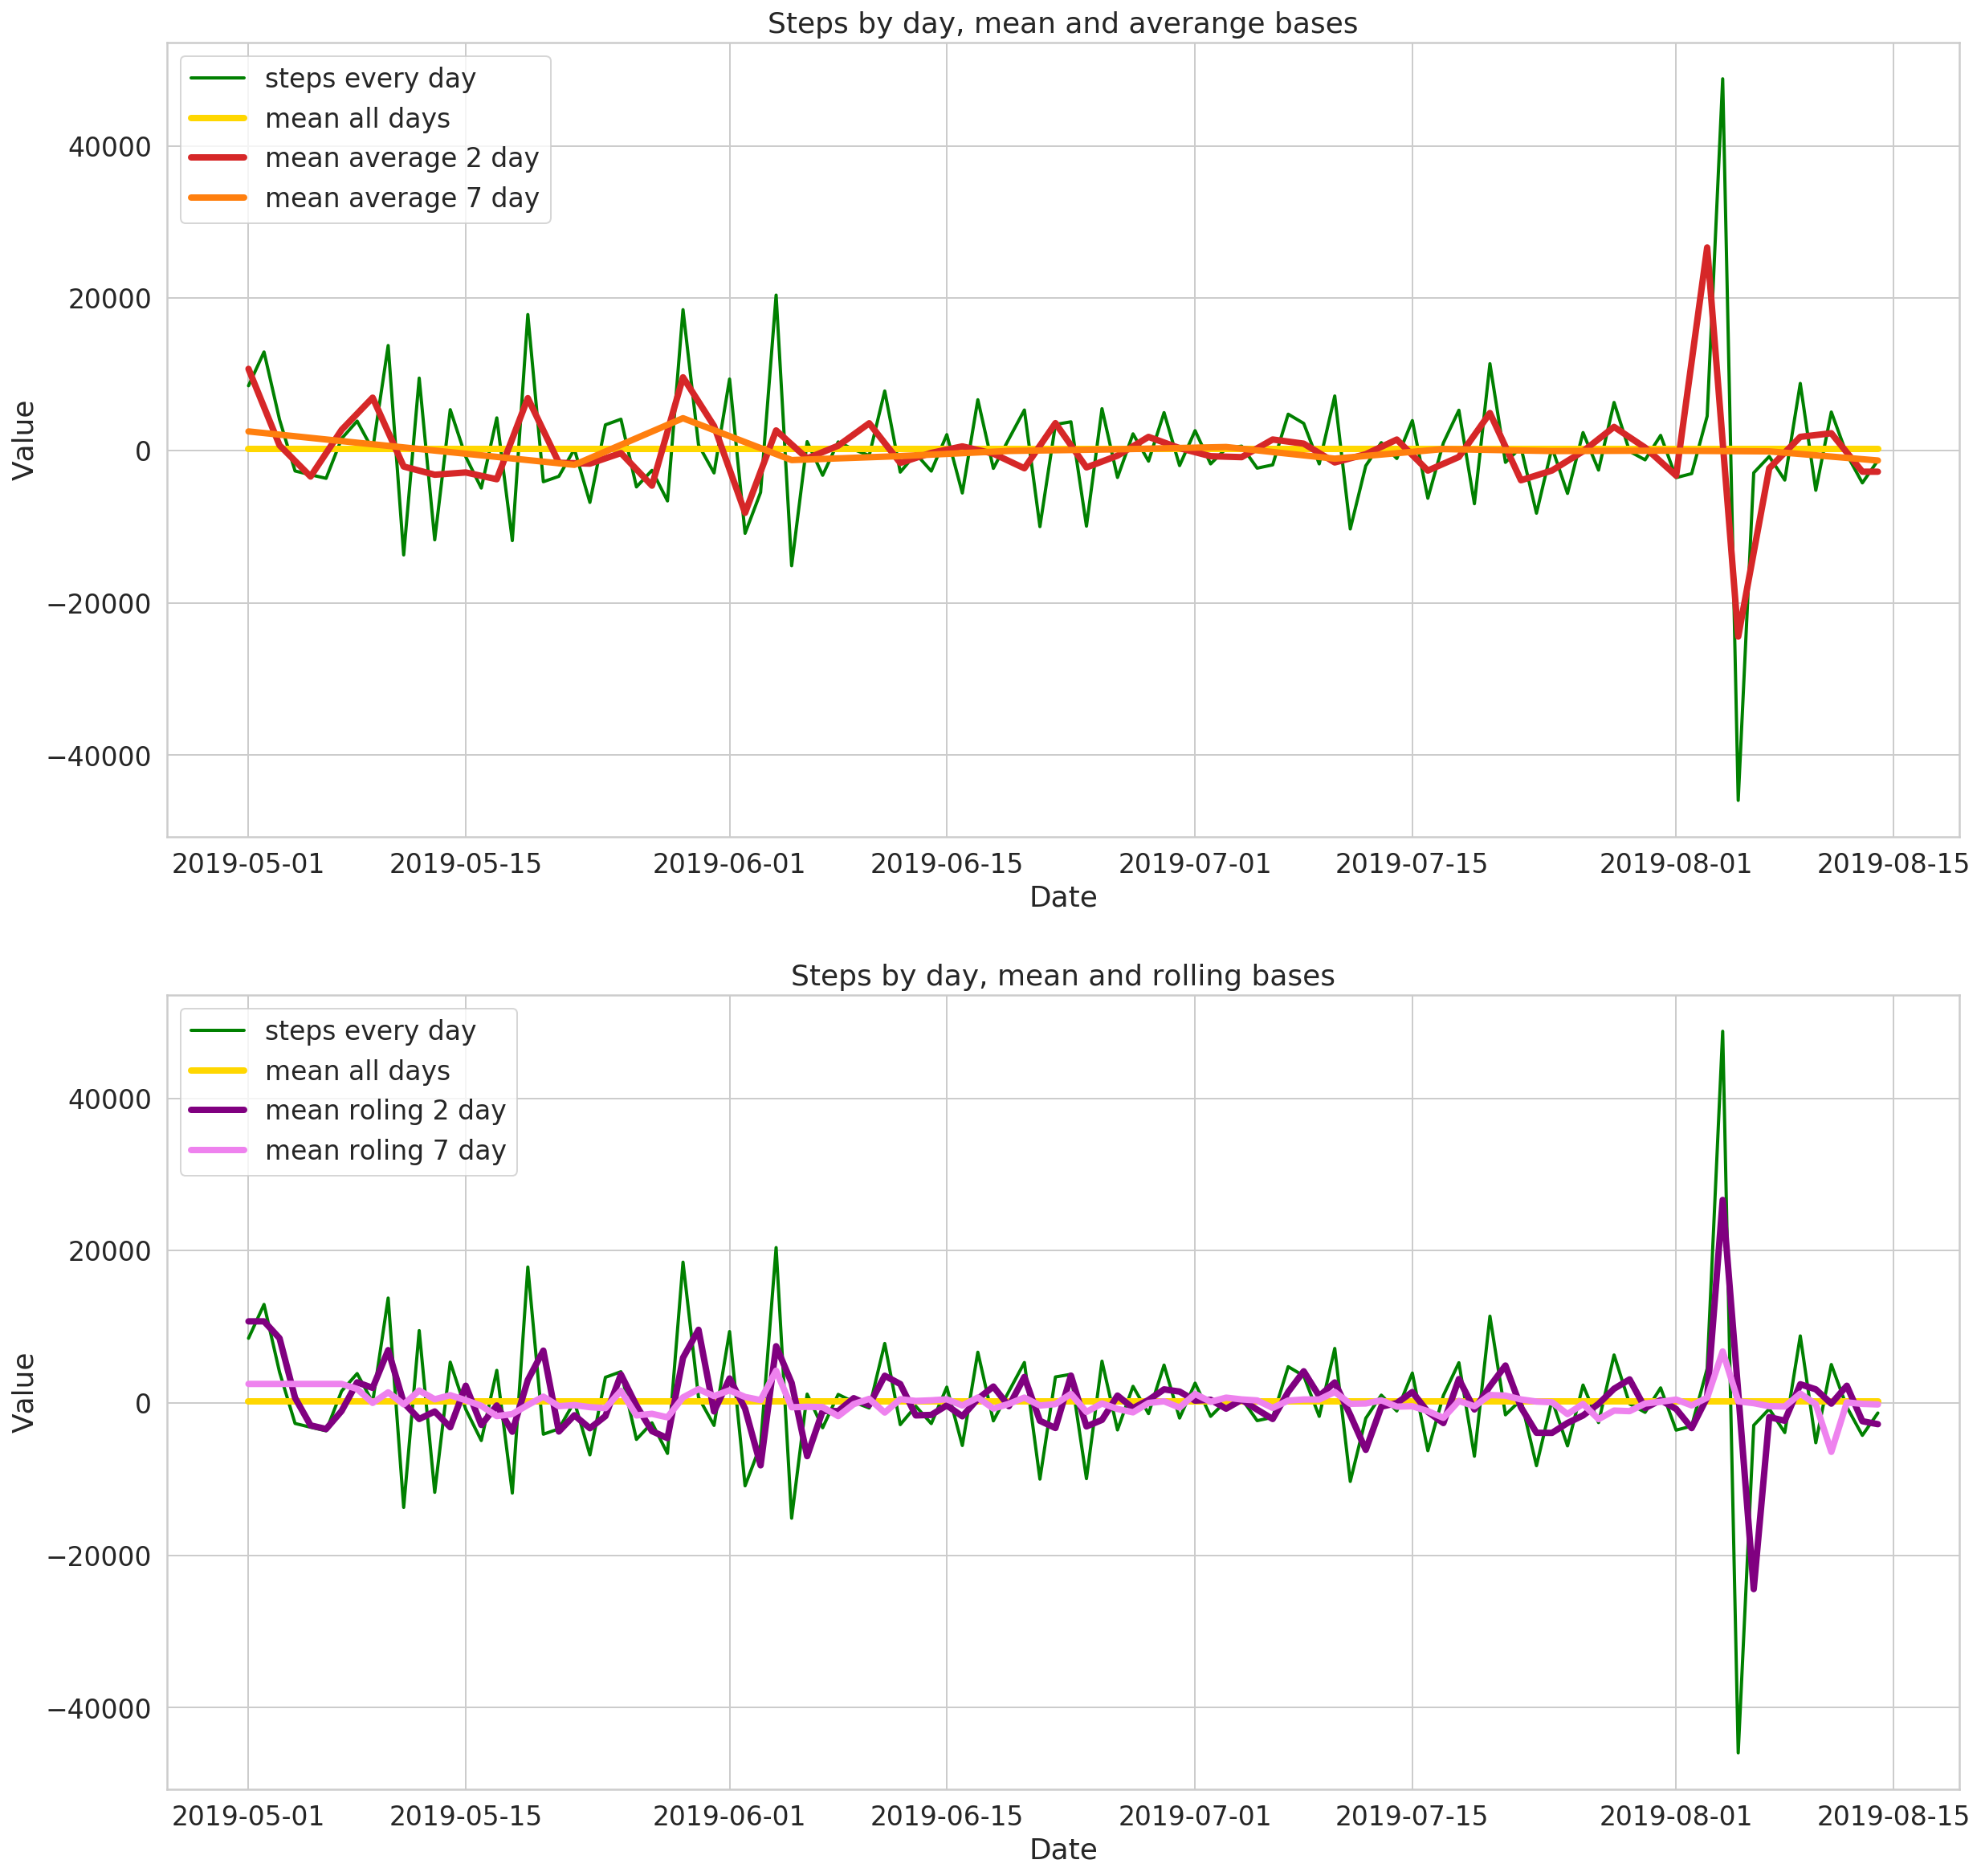

Set dataframe resize from  (106, 8) to  (106, 197)

Absolute errors table:


mean     roll_2     roll_3     roll_7     avar_2  \
Percentile unusual                                                           
0.1                   7.400000   7.400000   9.400000   6.400000   0.600000   
0.2                  12.800000  18.800000  13.800000  13.800000  13.800000   
0.30000000000000004  18.200000  25.200000  23.200000  21.200000  24.200000   
0.4                  22.600000  29.600000  28.600000  23.600000  24.600000   
0.5                  25.000000  25.000000  29.000000  26.000000  19.000000   
0.6000000000000001   20.400000  22.400000  26.400000  20.400000  19.400000   
0.7000000000000001   14.800000  18.800000  22.800000  14.800000  16.800000   
0.8                   9.200000  12.200000  12.200000  11.200000  11.200000   
0.9                   3.600000   5.600000   3.600000   4.600000   4.600000   
MEAN_ERROR           14.888889  18.333333  18.777778  15.777778  14.911111   

                        avar_3     avar_7    best  mean_error  
Percentile unusual                                             
0.1                  10.400000   6.400000  avar_2    6.857143  
0.2                  14.800000  15.800000    mean   14.800000  
0.30000000000000004  13.200000  19.200000  avar_3   20.628571  
0.4                  16.600000  19.600000  avar_3   23.600000  
0.5                  22.000000  25.000000  avar_2   24.428571  
0.6000000000000001   16.400000  20.400000  avar_3   20.828571  
0.7000000000000001   15.800000  15.800000    mean   17.085714  
0.8                   9.200000  10.200000    mean   10.771429  
0.9                   3.600000   5.600000    mean    4.457143  
MEAN_ERROR           13.555556  15.333333     NaN   15.939683

Select best percentile: 0.9
Select best base: avar_3


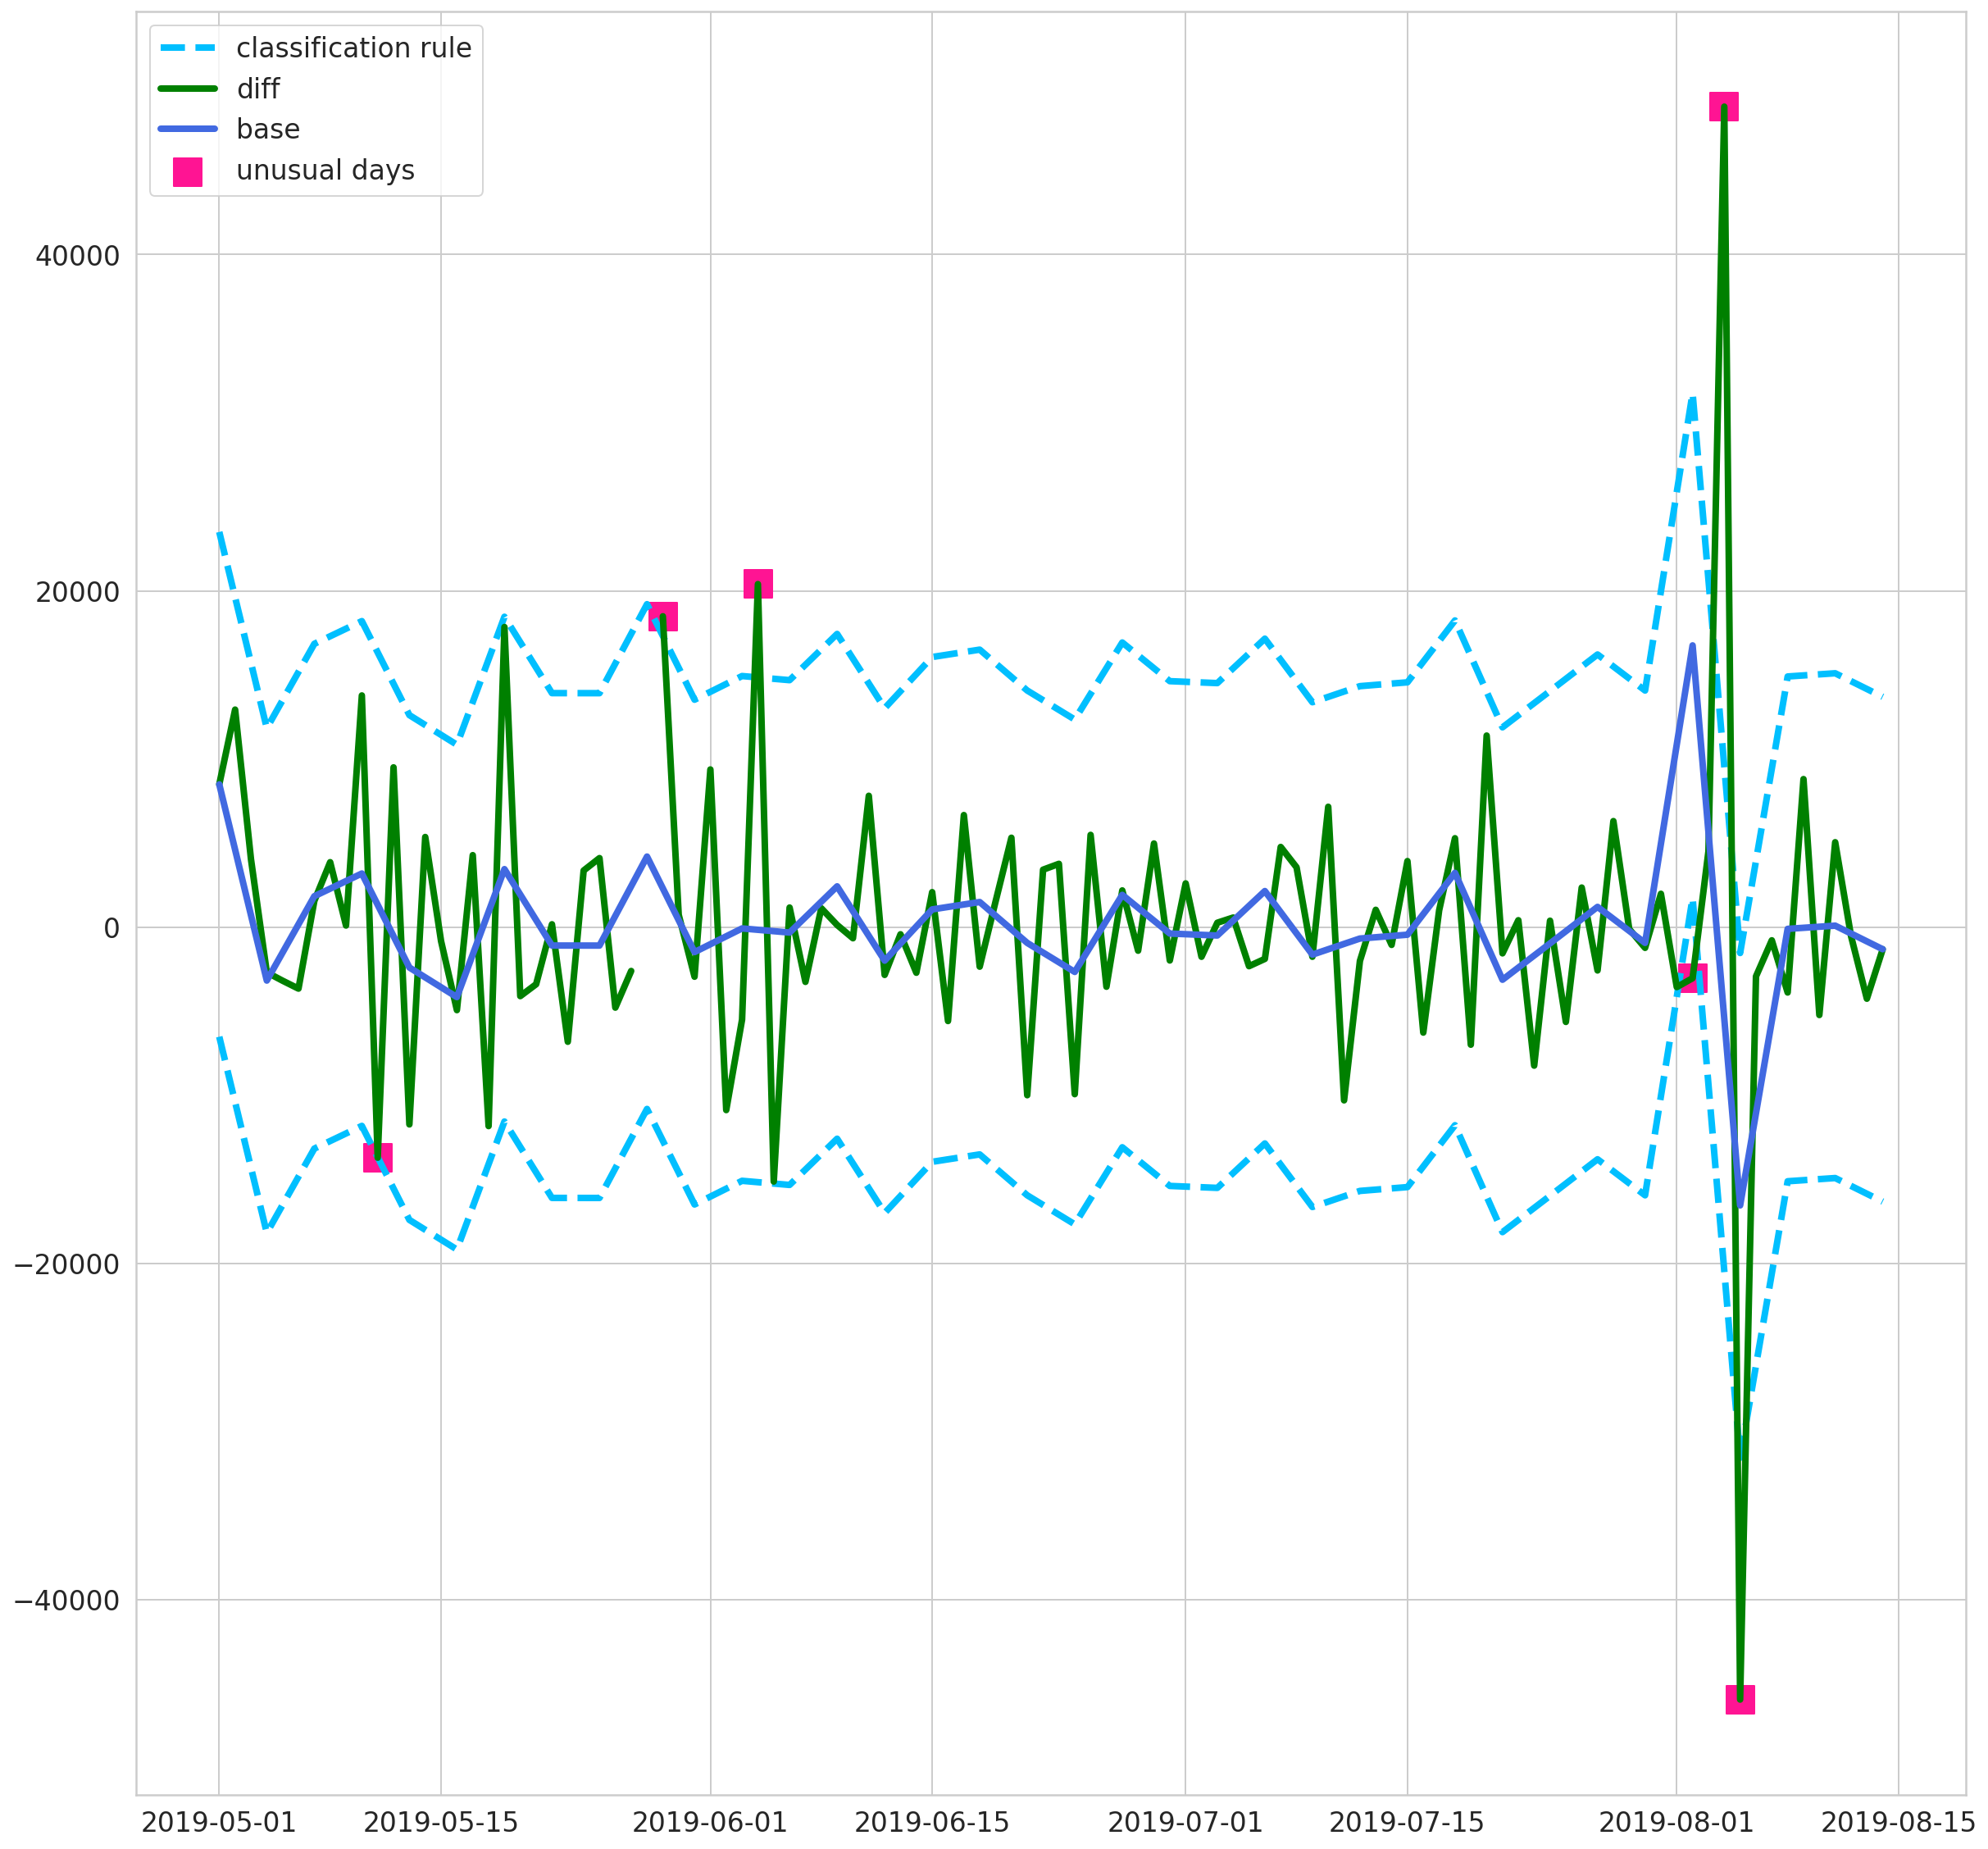

In [162]:
out_F_repl_F = detect_typical_days_pipeline(data, exclude_outliers=False, replace_empty_mean=False, draw=True)

Lenght data did not change = 39671
Replace empty days mean = 15088.590476190477 in 1  day(s) in set
New lenght set =  106
p_value_norm =        2.2222343323137577e-12
p_value_diff_1_norm = 2.789598792145806e-09
Select first differences of the series


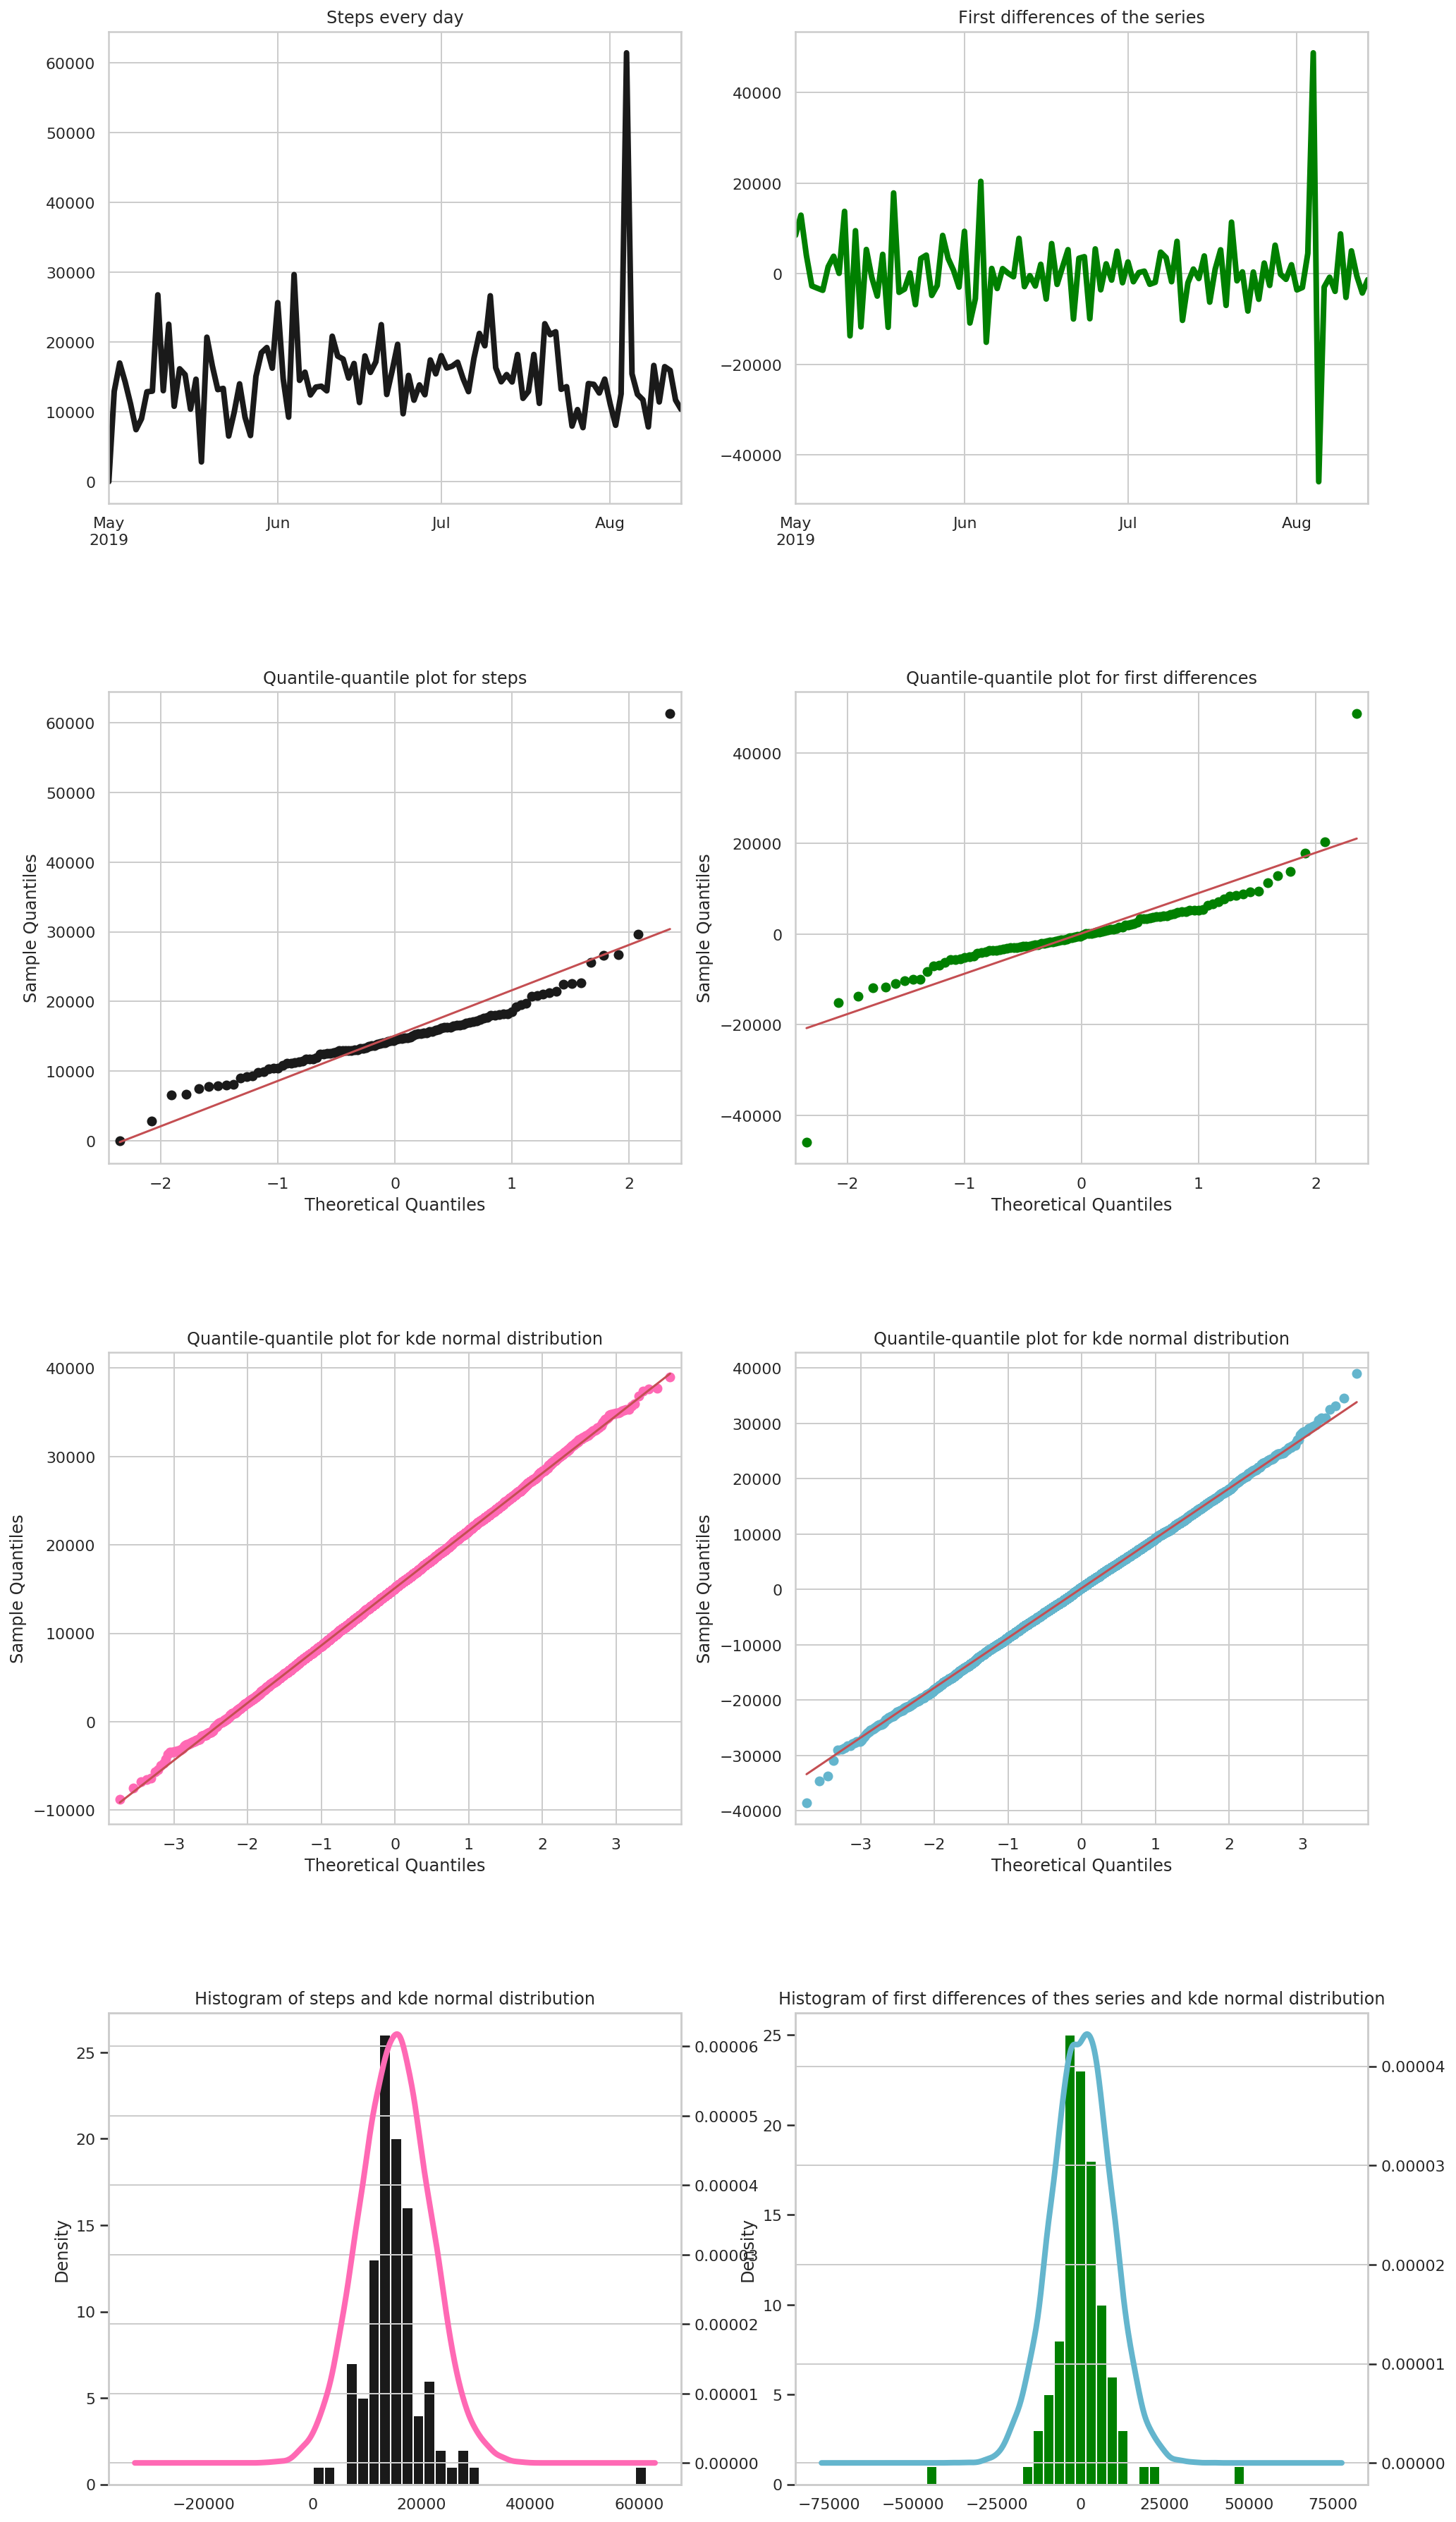

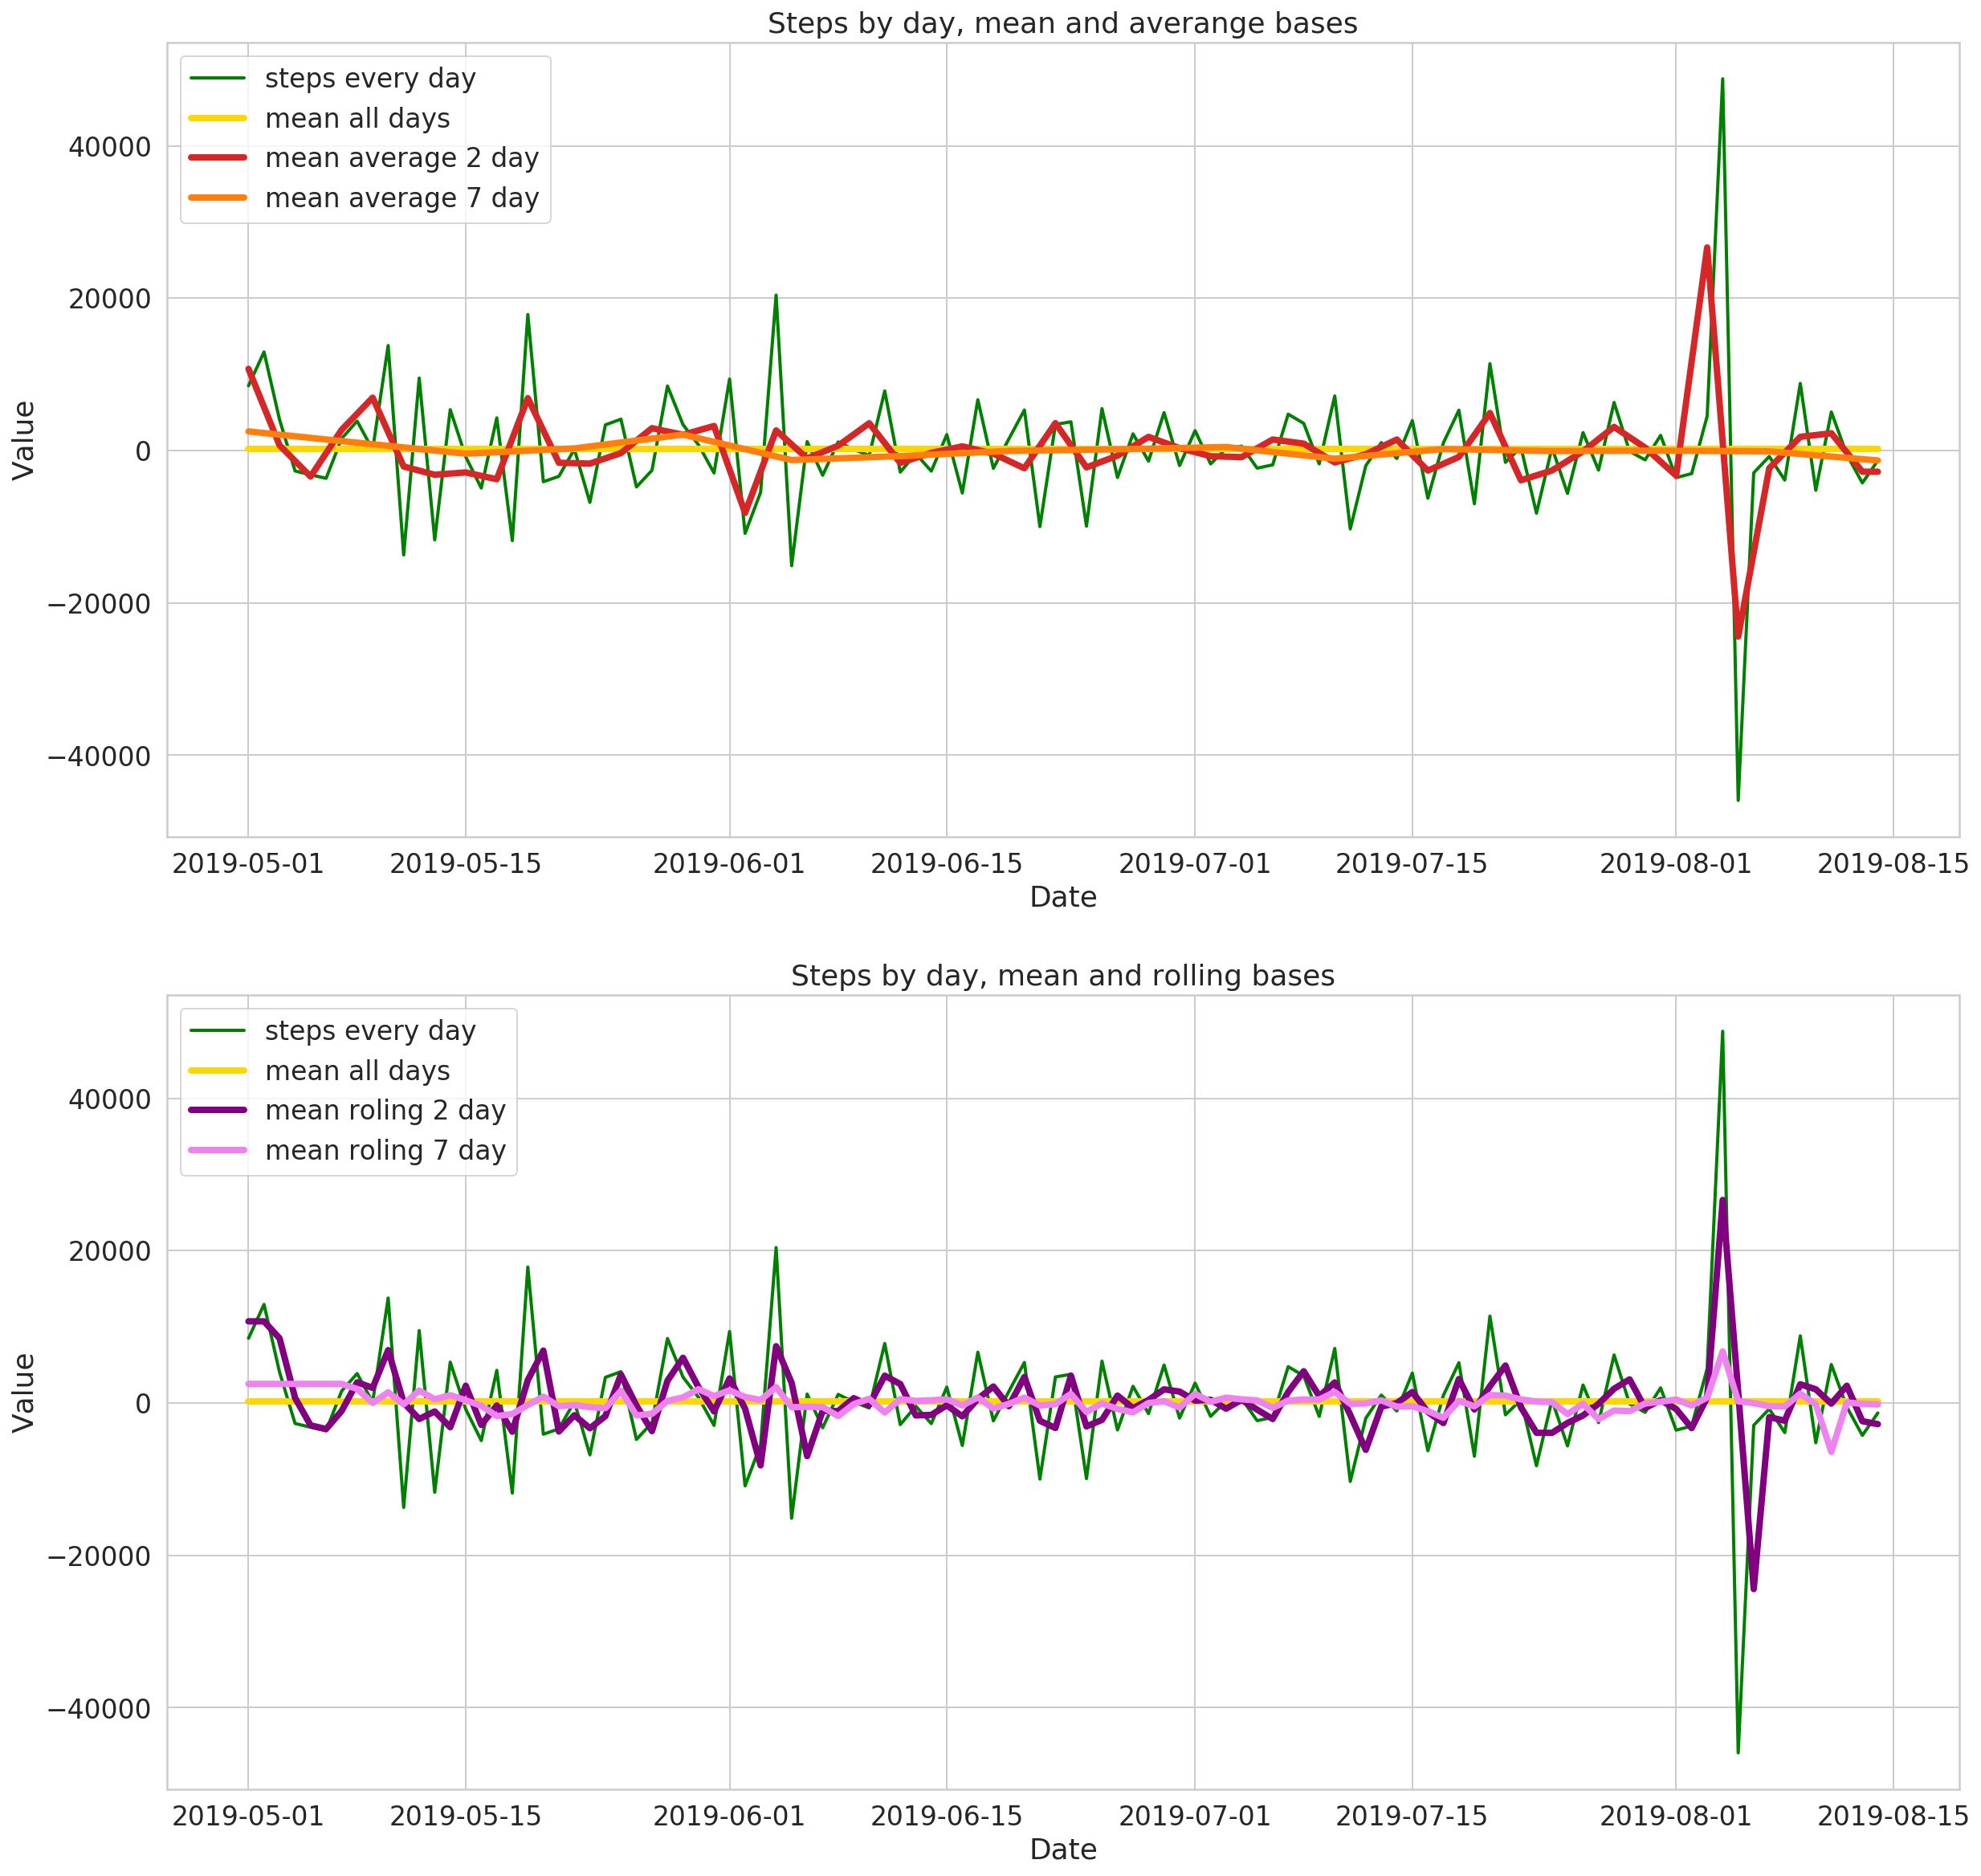

Set dataframe resize from  (106, 8) to  (106, 197)

Absolute errors table:


mean     roll_2     roll_3     roll_7  avar_2  \
Percentile unusual                                                        
0.1                   7.400000   6.400000   8.400000   6.400000     0.6   
0.2                  12.800000  18.800000  13.800000  13.800000    11.8   
0.30000000000000004  18.200000  24.200000  23.200000  21.200000    23.2   
0.4                  22.600000  30.600000  27.600000  22.600000    23.6   
0.5                  24.000000  24.000000  30.000000  26.000000    17.0   
0.6000000000000001   19.400000  22.400000  26.400000  20.400000    18.4   
0.7000000000000001   14.800000  18.800000  21.800000  14.800000    15.8   
0.8                   9.200000  11.200000  12.200000  10.200000     9.2   
0.9                   4.600000   3.600000   4.600000   5.600000     4.6   
MEAN_ERROR           14.777778  17.777778  18.666667  15.666667    13.8   

                        avar_3     avar_7    best  mean_error  
Percentile unusual                                             
0.1                   9.400000   8.400000  avar_2    6.714286  
0.2                  13.800000  14.800000  avar_2   14.228571  
0.30000000000000004  13.200000  17.200000  avar_3   20.057143  
0.4                  16.600000  22.600000  avar_3   23.742857  
0.5                  22.000000  24.000000  avar_2   23.857143  
0.6000000000000001   16.400000  19.400000  avar_3   20.400000  
0.7000000000000001   15.800000  14.800000    mean   16.657143  
0.8                   9.200000  10.200000    mean   10.200000  
0.9                   3.600000   5.600000  roll_2    4.600000  
MEAN_ERROR           13.333333  15.222222     NaN   15.606349

Select best percentile: 0.9
Select best base: avar_3


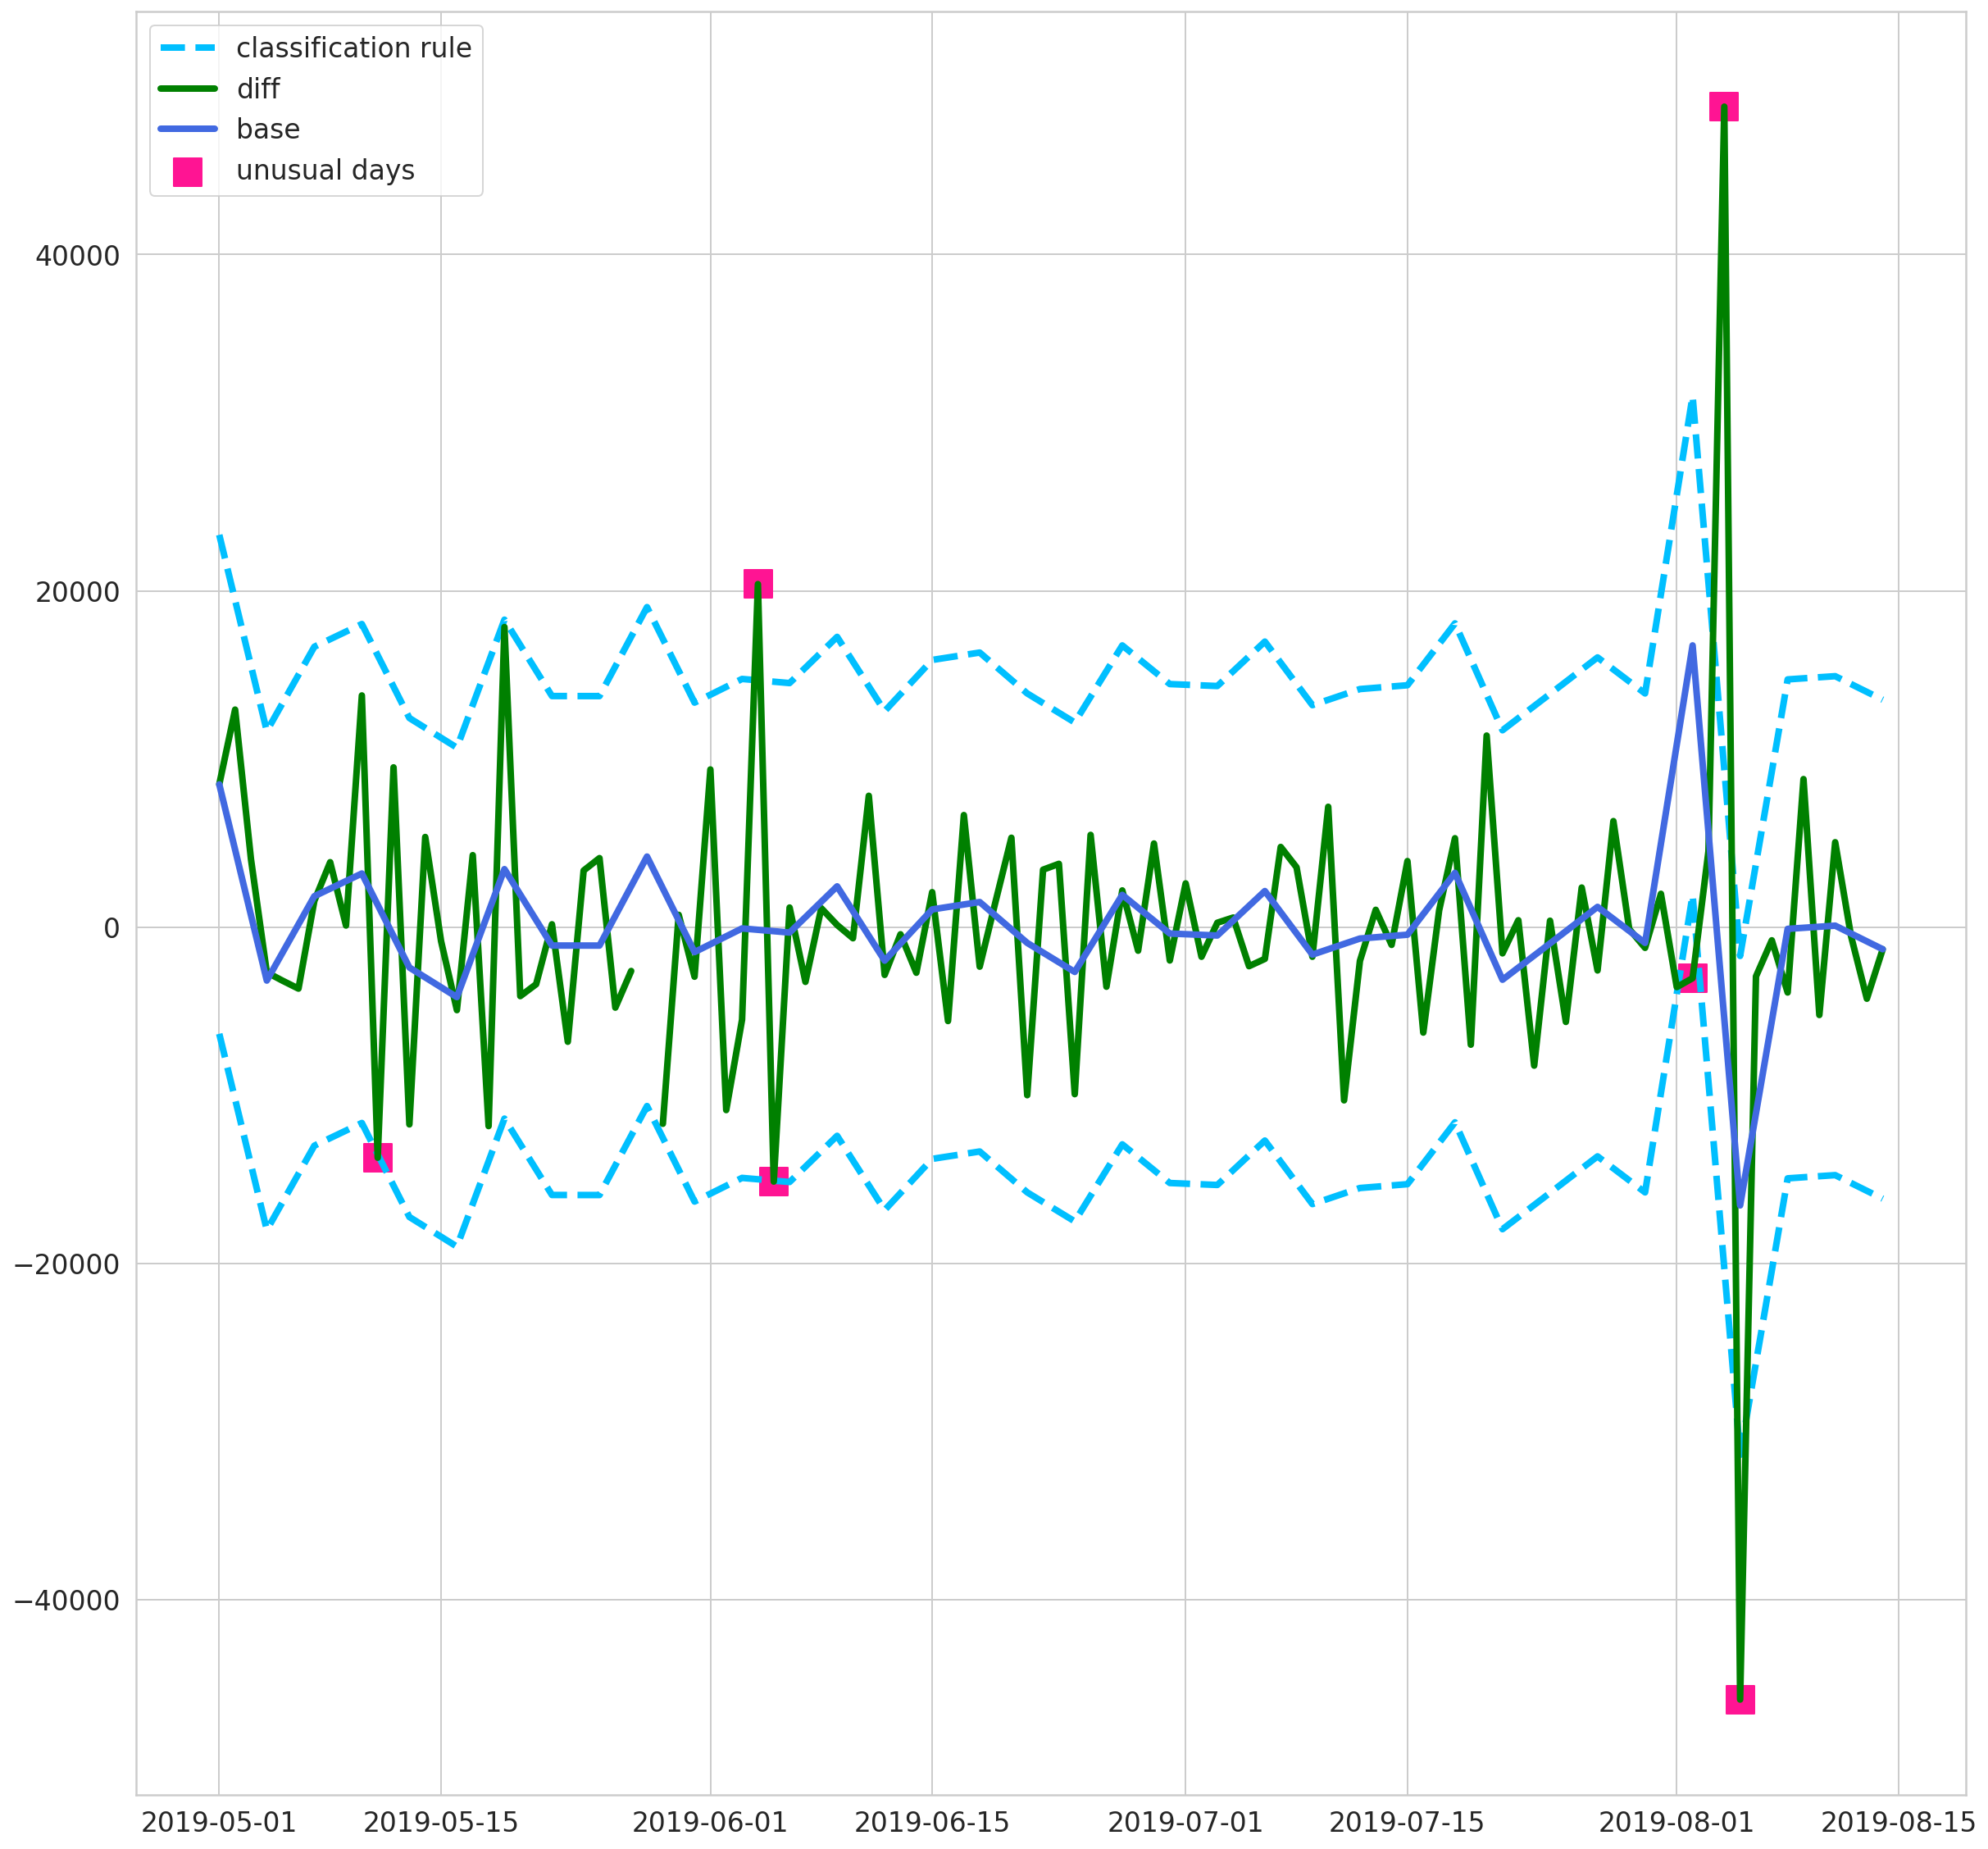

In [163]:
out_F_repl_T = detect_typical_days_pipeline(data, exclude_outliers=False, replace_empty_mean=True, draw=True)

Remove from data outliers data in count =  15  records
New lenght data = 39656
Replace empty days 0 in 1  day(s) in set
New lenght set =  106
p_value_norm =        0.057912061969247836
p_value_diff_1_norm = 0.020532108166420832
Select real data values


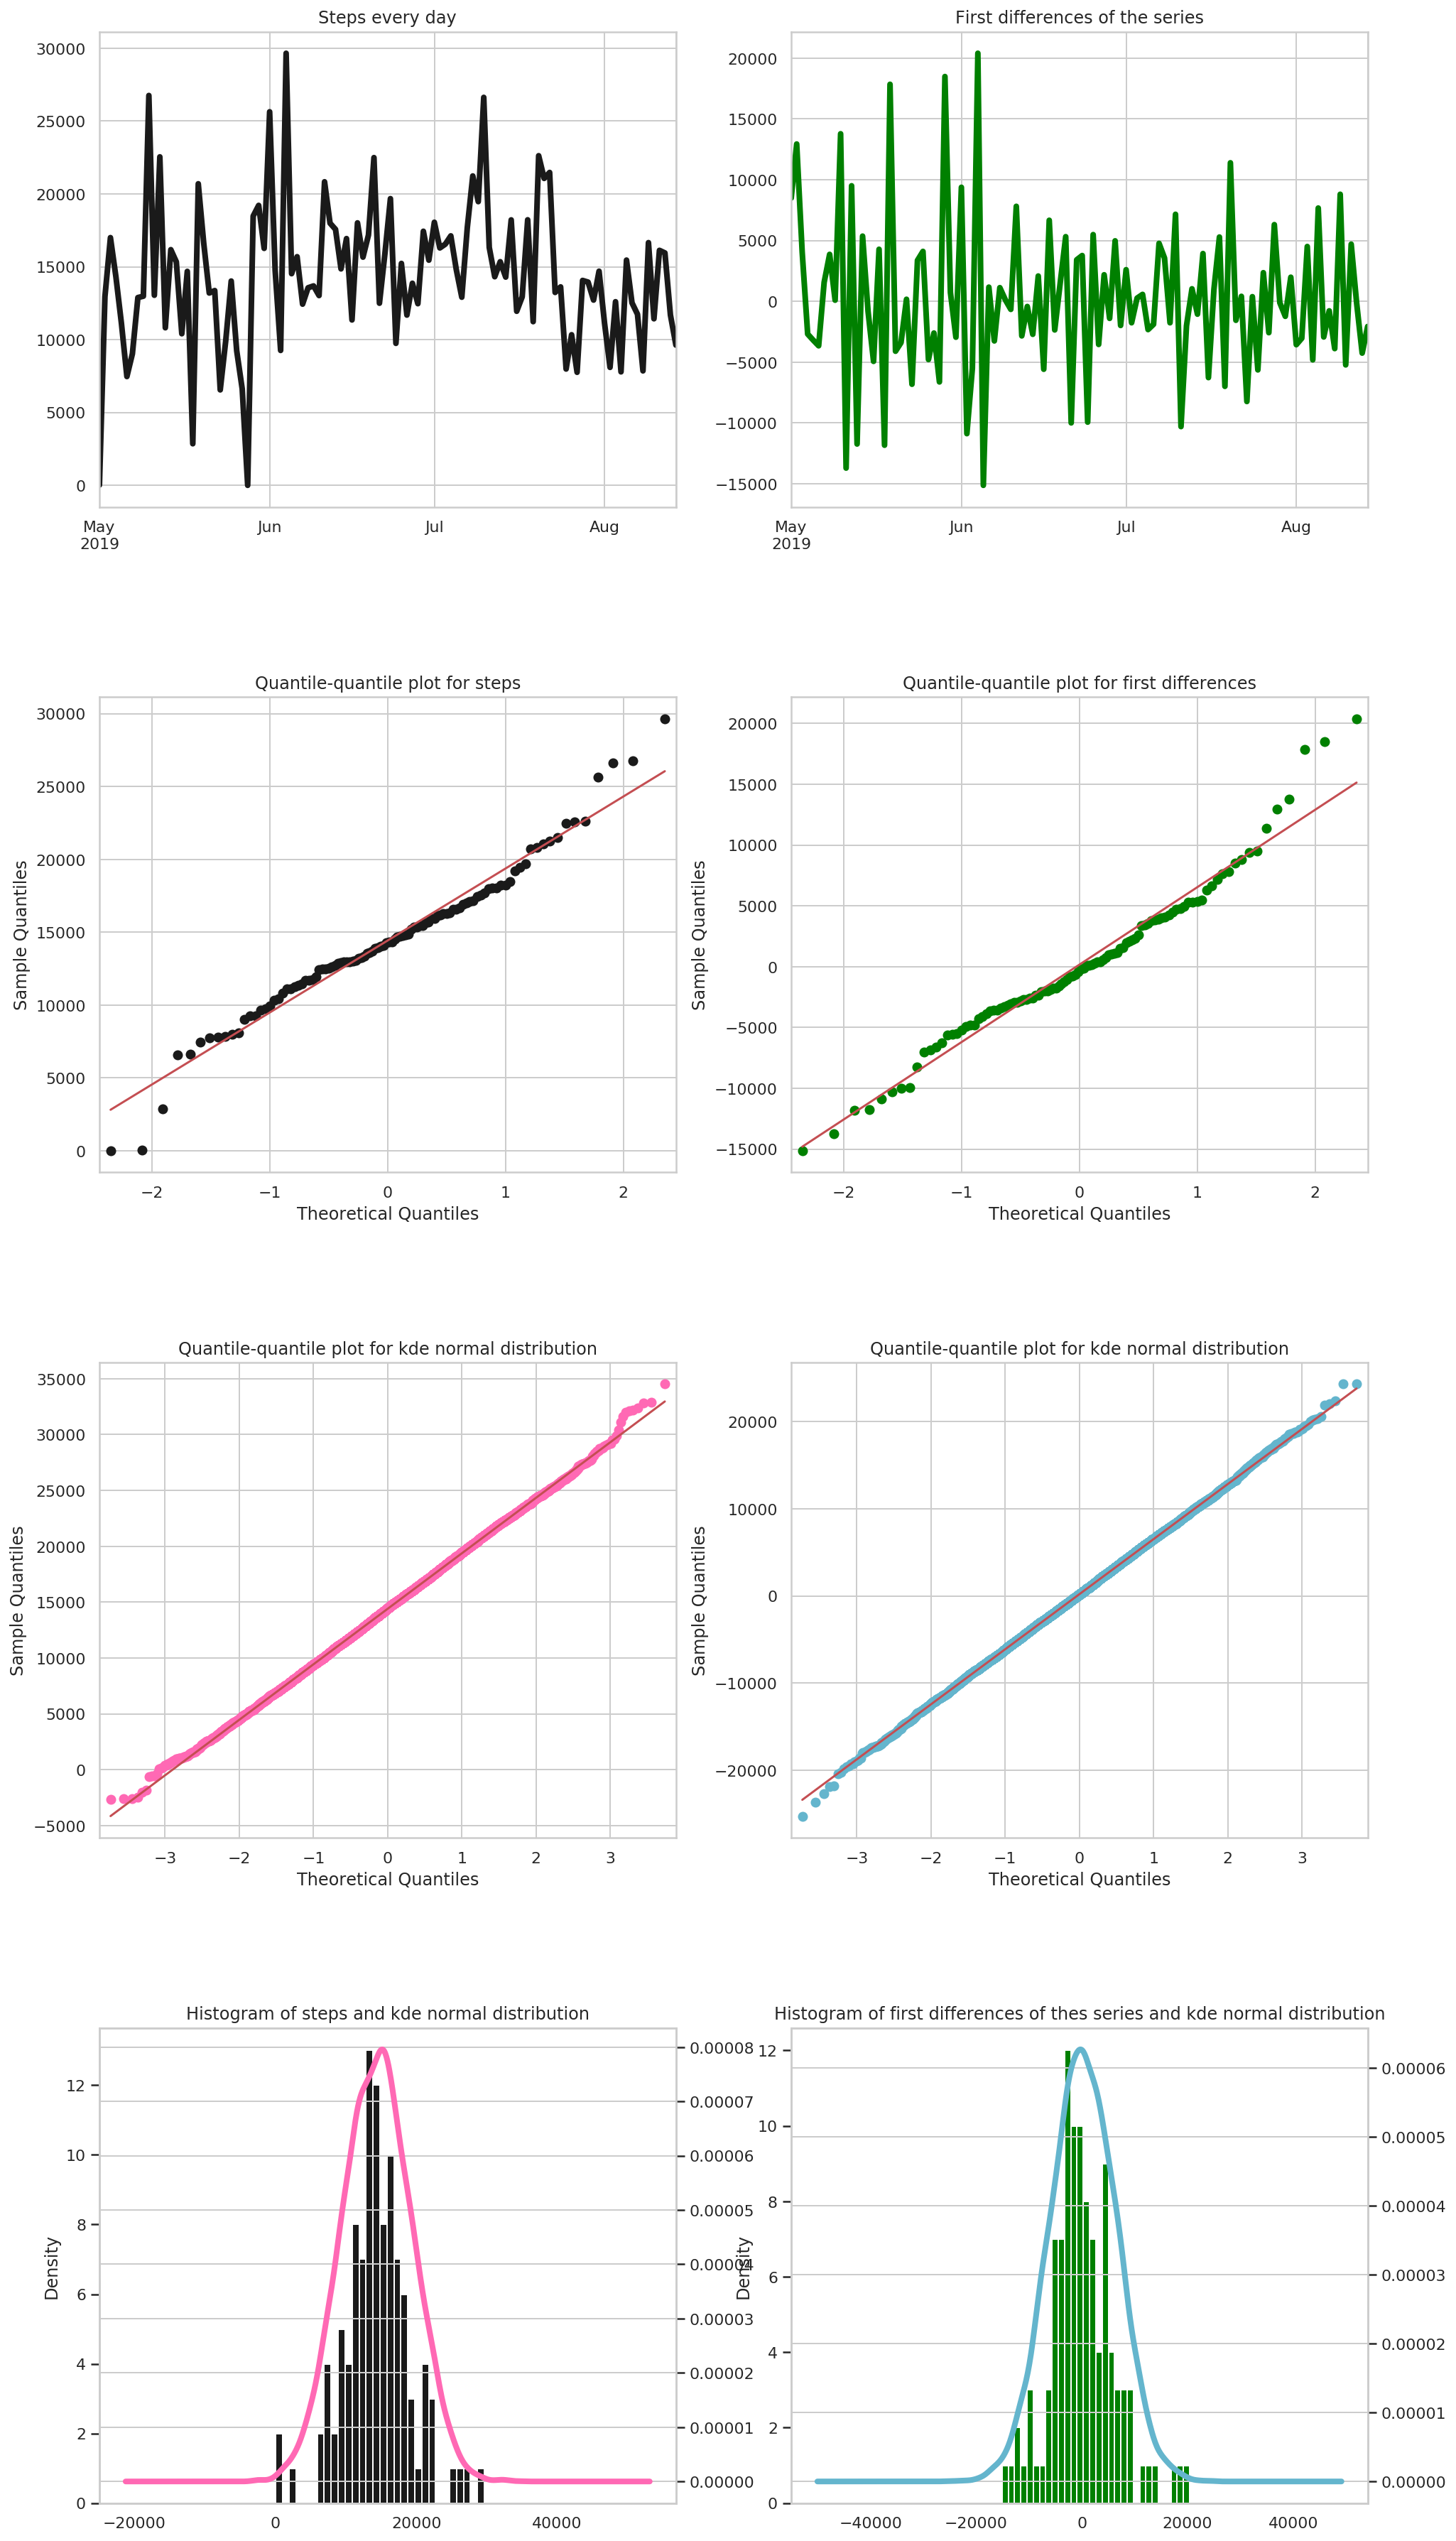

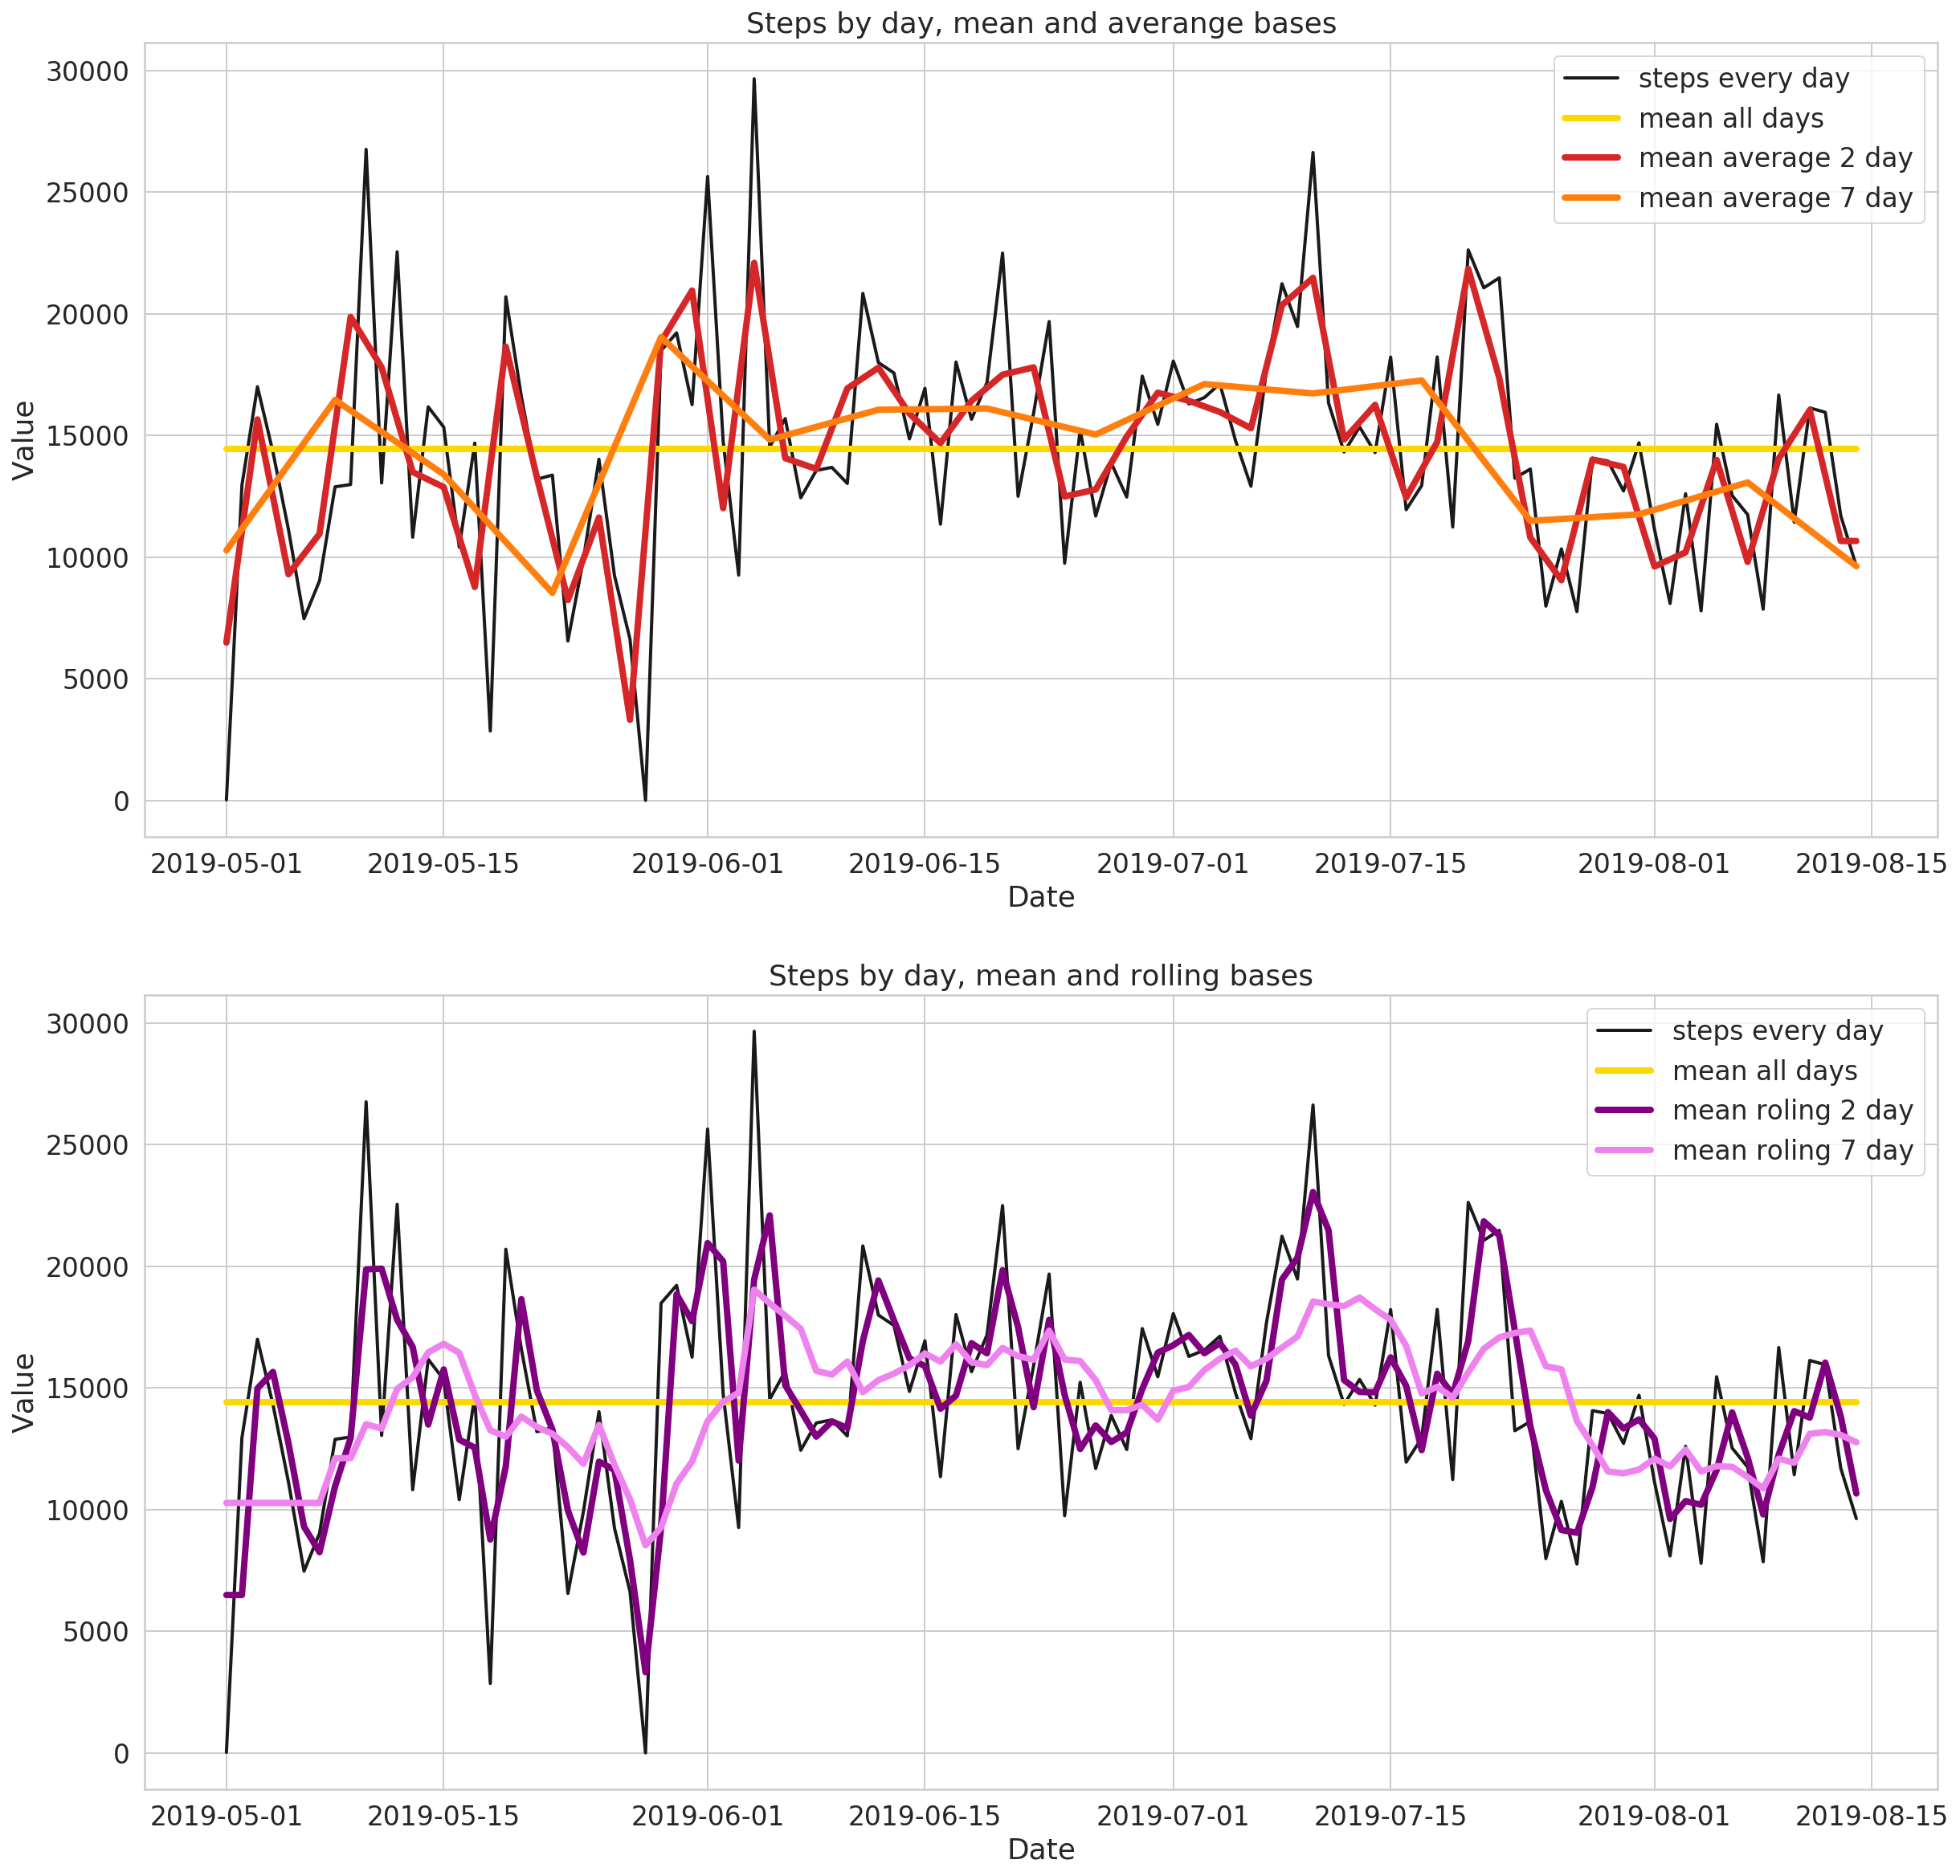

Set dataframe resize from  (106, 8) to  (106, 197)

Absolute errors table:


mean     roll_2     roll_3     roll_7     avar_2  \
Percentile unusual                                                           
0.1                   5.400000  13.400000  15.400000   7.400000  13.400000   
0.2                  13.800000  25.800000  19.800000  12.800000  24.800000   
0.30000000000000004  19.200000  37.200000  20.200000  14.200000  34.200000   
0.4                  22.600000  38.600000  27.600000  20.600000  36.600000   
0.5                  21.000000  34.000000  30.000000  23.000000  35.000000   
0.6000000000000001   19.400000  29.400000  31.400000  20.400000  30.400000   
0.7000000000000001   16.800000  23.800000  22.800000  17.800000  21.800000   
0.8                  13.200000  16.200000  15.200000  13.200000  17.200000   
0.9                   2.600000   8.600000   7.600000   6.600000   7.600000   
MEAN_ERROR           14.888889  25.222222  21.111111  15.111111  24.555556   

                        avar_3  avar_7    best  mean_error  
Percentile unusual                                          
0.1                  10.400000     7.4    mean   10.400000  
0.2                  18.800000    14.8  roll_7   18.657143  
0.30000000000000004  23.200000    19.2  roll_7   23.914286  
0.4                  30.600000    21.6  roll_7   28.314286  
0.5                  33.000000    23.0    mean   28.428571  
0.6000000000000001   28.400000    22.4    mean   25.971429  
0.7000000000000001   23.800000    16.8    mean   20.514286  
0.8                  15.200000    12.2  avar_7   14.628571  
0.9                   6.600000     6.6    mean    6.600000  
MEAN_ERROR           21.111111    16.0     NaN   19.714286

Select best percentile: 0.9
Select best base: mean


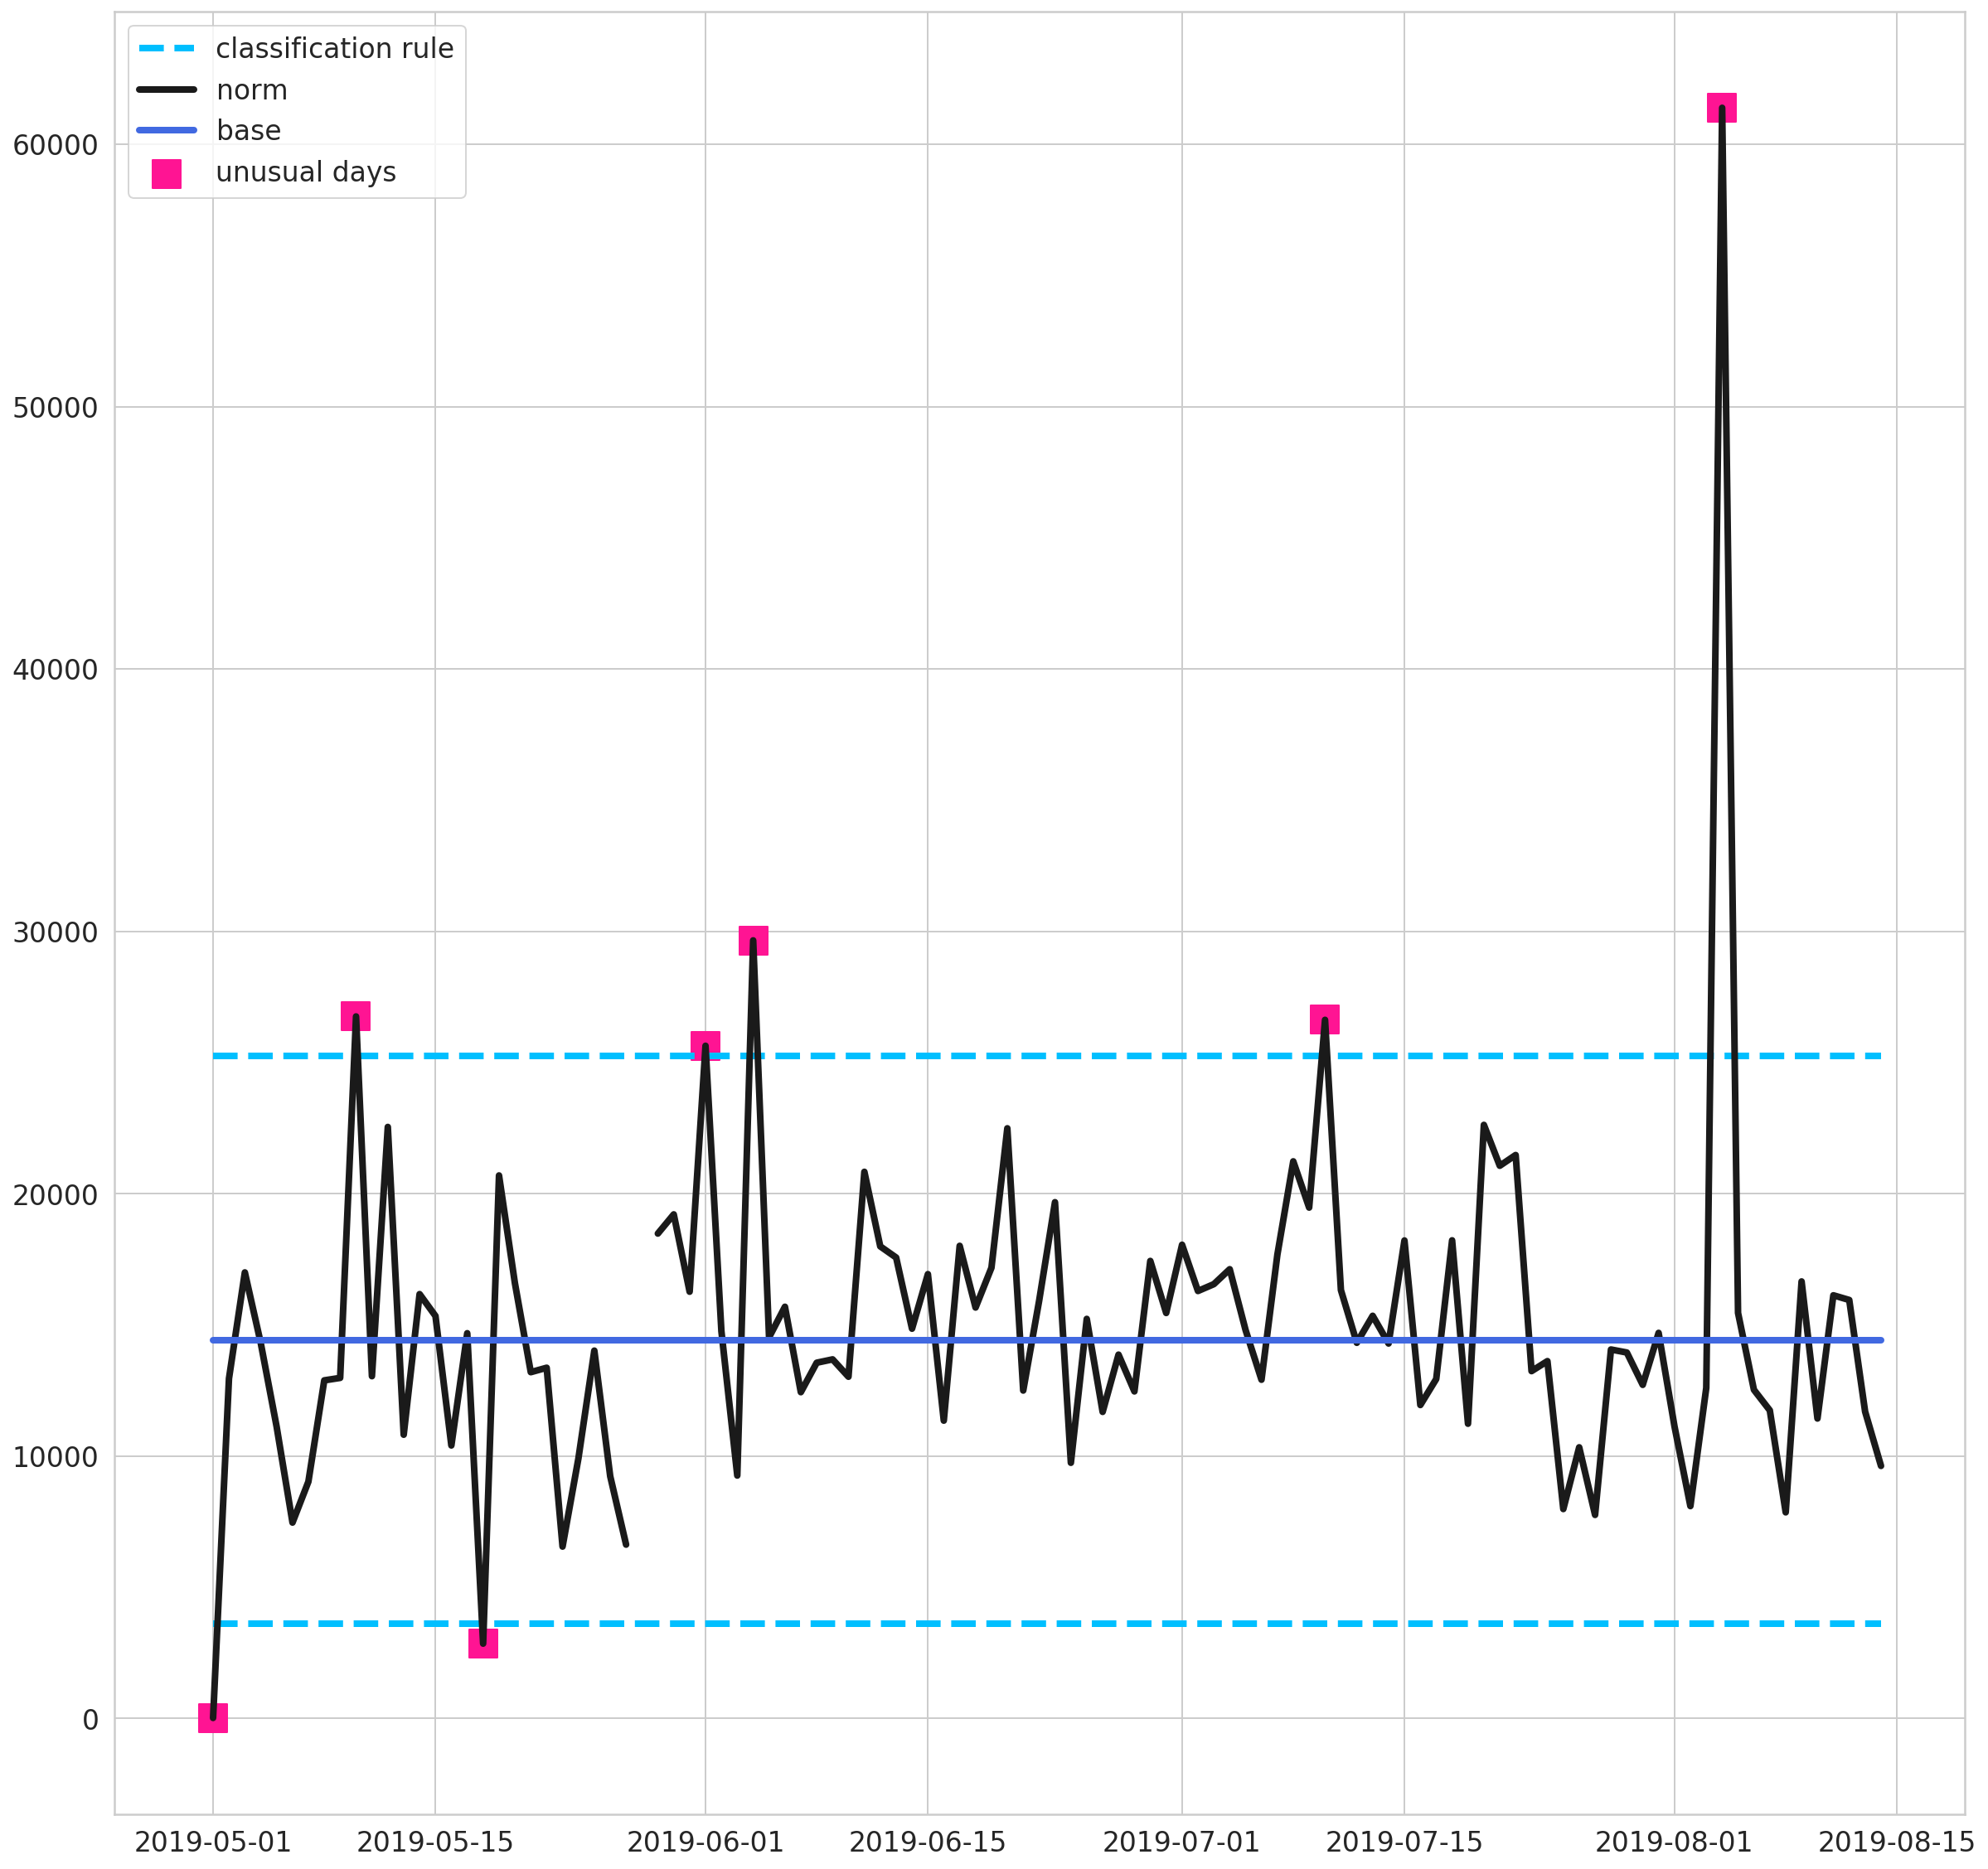

In [164]:
out_T_repl_F = detect_typical_days_pipeline(data, exclude_outliers=True,  replace_empty_mean=False, draw=True)

Remove from data outliers data in count =  15  records
New lenght data = 39656
Replace empty days mean = 14567.571428571428 in 1  day(s) in set
New lenght set =  106
p_value_norm =        0.05441323658432051
p_value_diff_1_norm = 0.09210723058002669
Select first differences of the series


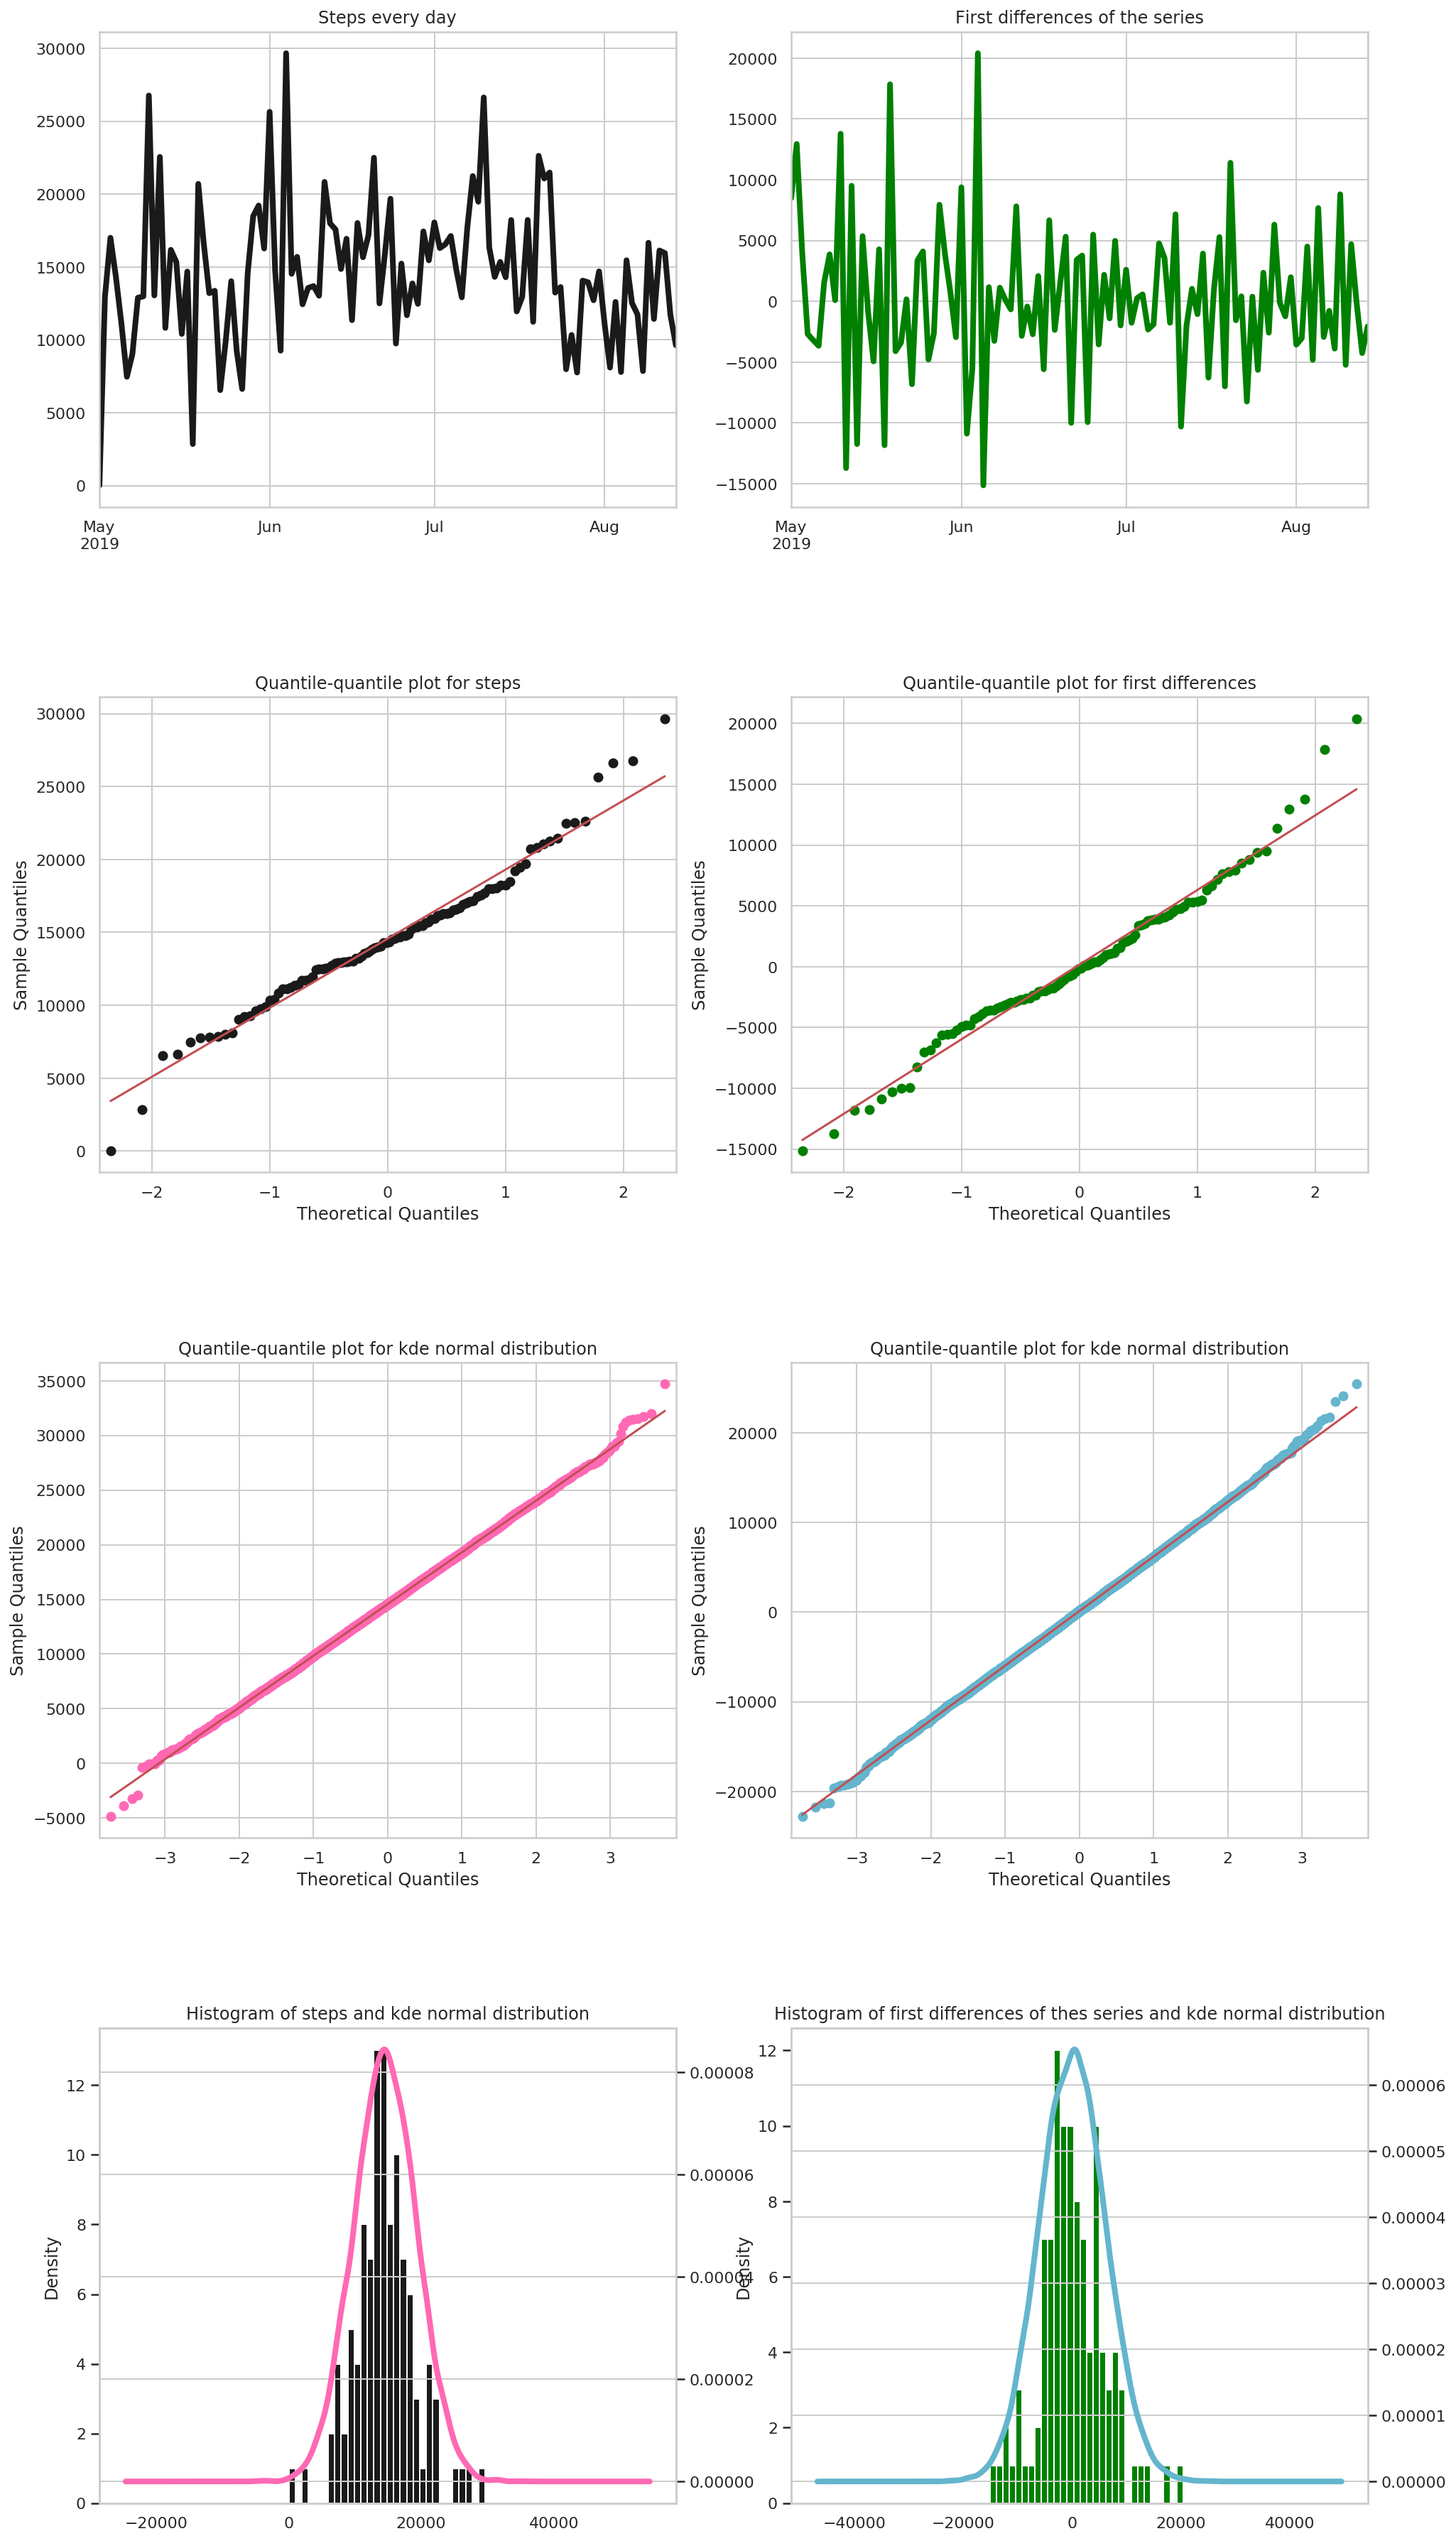

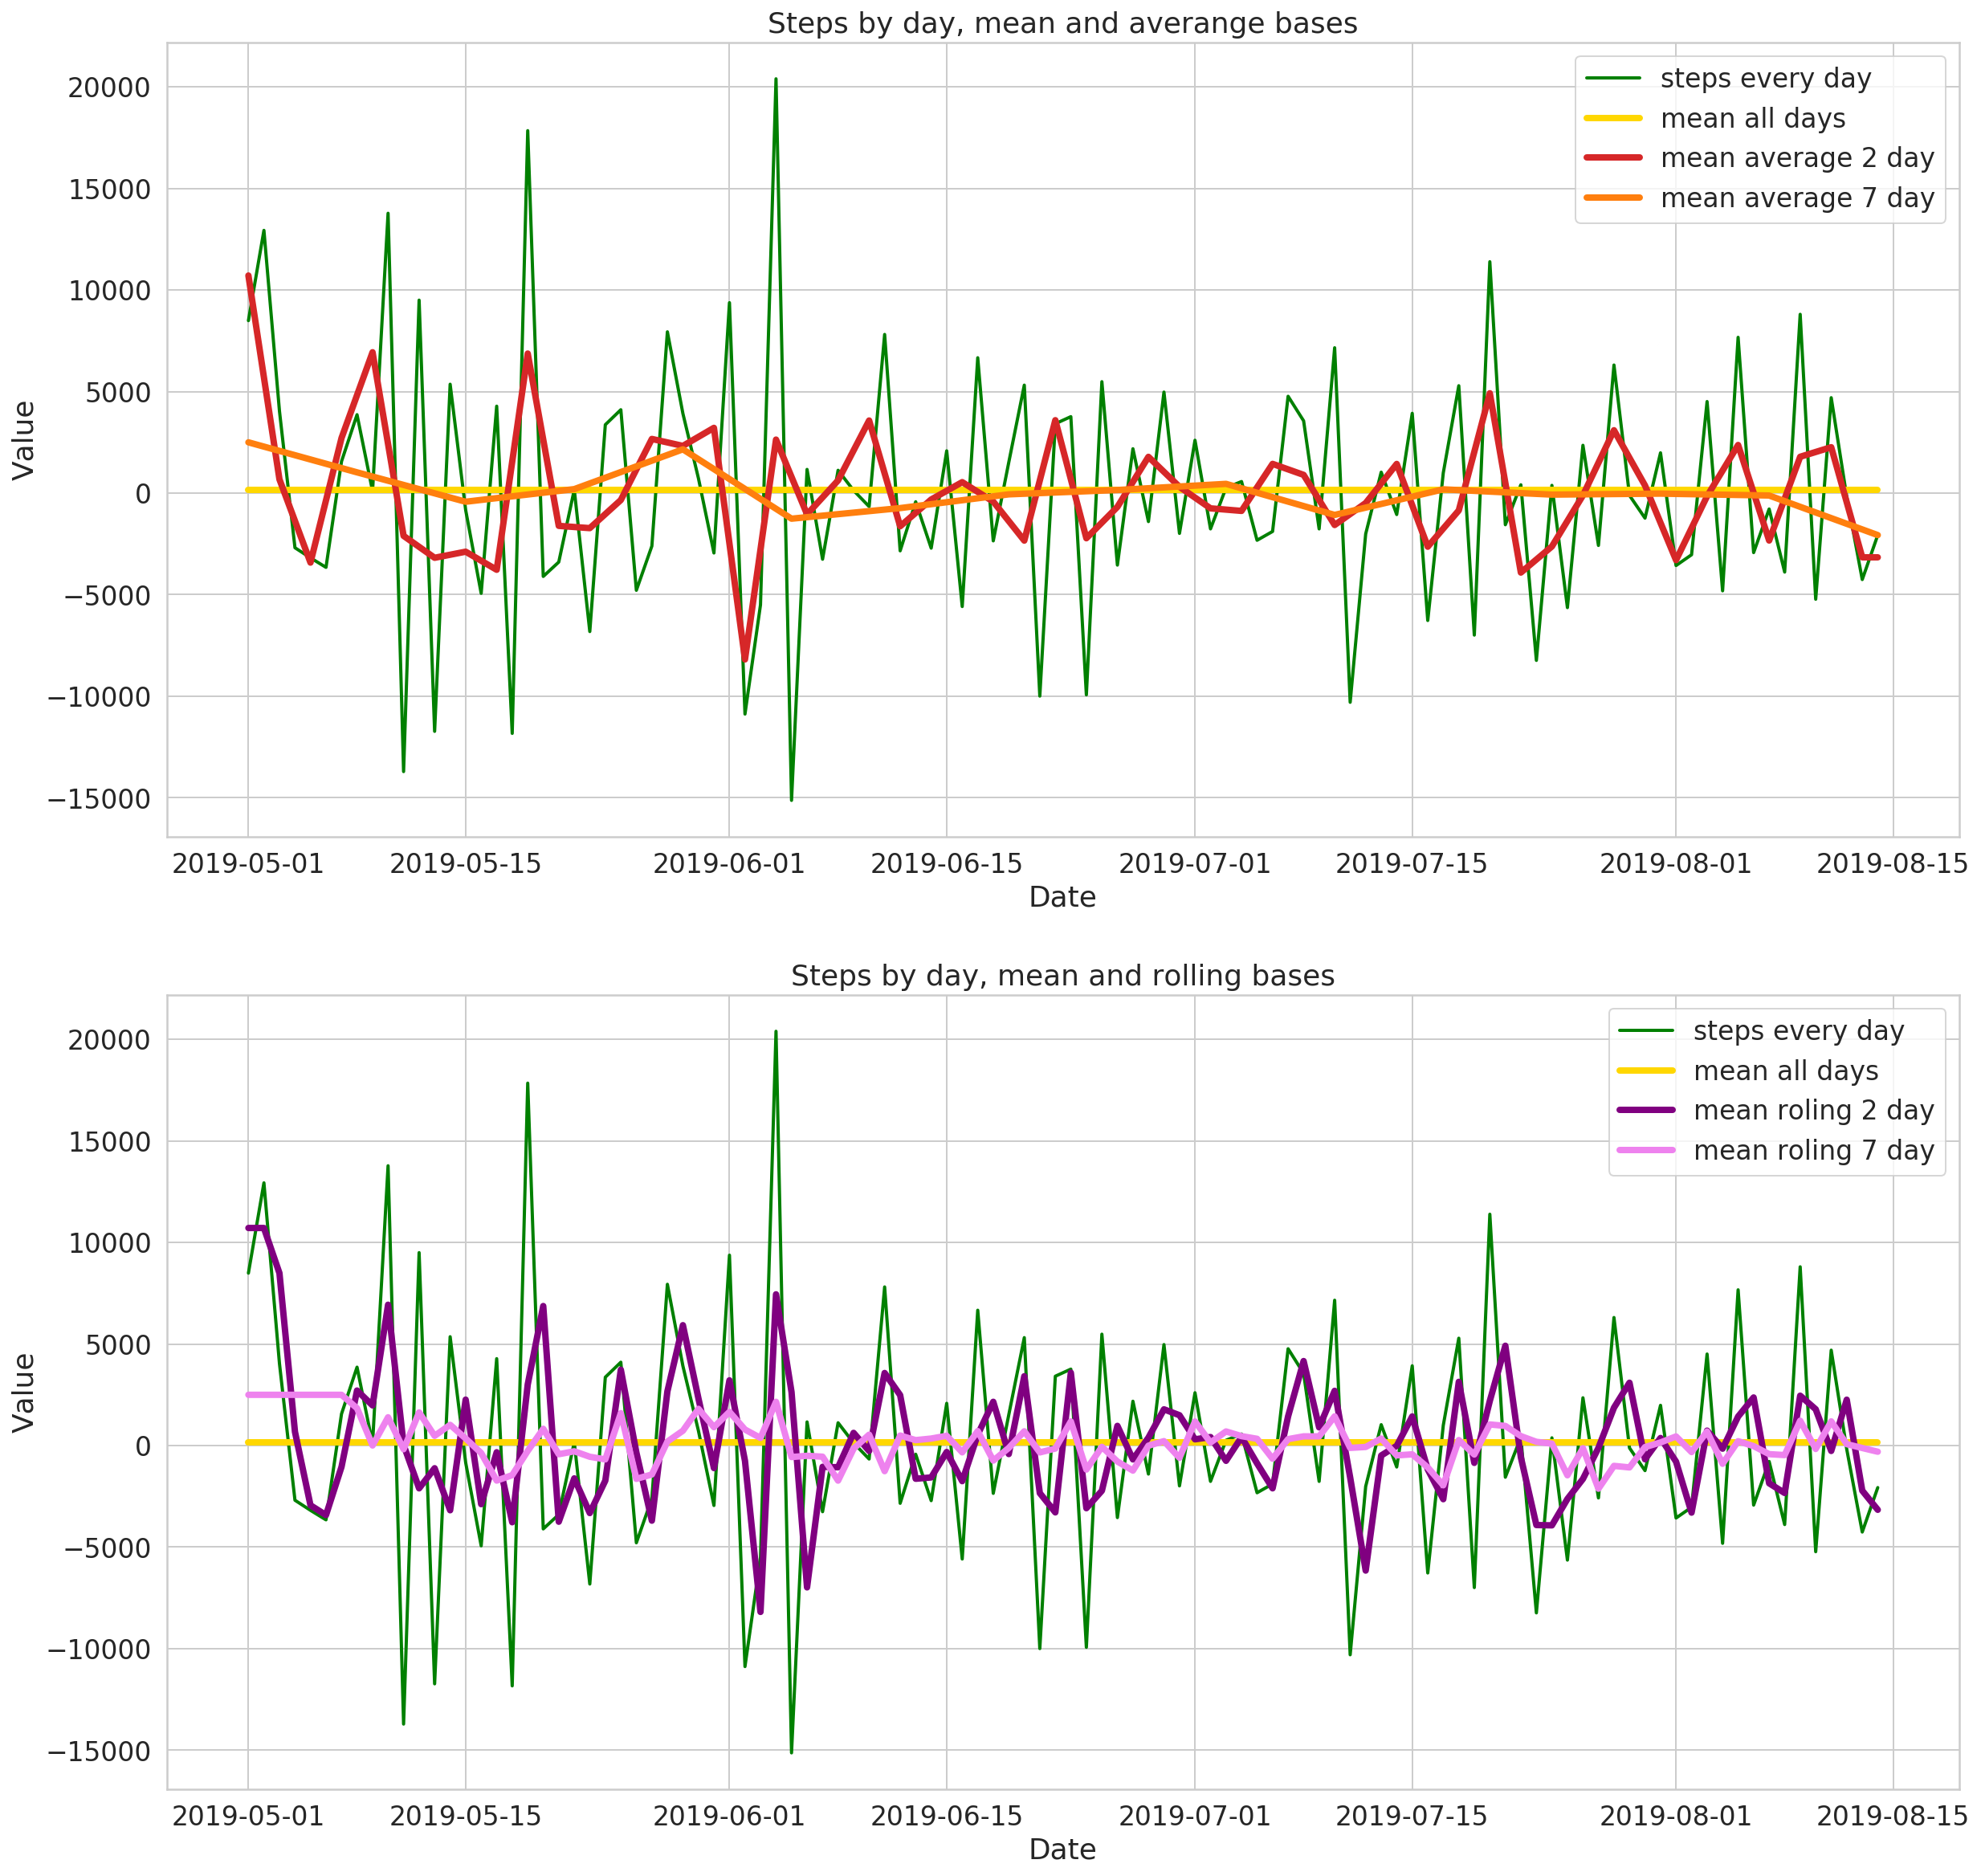

Set dataframe resize from  (106, 8) to  (106, 197)

Absolute errors table:


mean     roll_2     roll_3     roll_7     avar_2  \
Percentile unusual                                                           
0.1                   5.400000   1.400000   8.400000   4.400000   2.600000   
0.2                   6.800000  10.800000  13.800000  11.800000   7.800000   
0.30000000000000004  10.200000  19.200000  16.200000  15.200000  17.200000   
0.4                  17.600000  19.600000  18.600000  16.600000  19.600000   
0.5                  19.000000  23.000000  27.000000  20.000000  19.000000   
0.6000000000000001   16.400000  20.400000  23.400000  19.400000  14.400000   
0.7000000000000001   10.800000  16.800000  19.800000  13.800000  14.800000   
0.8                   5.200000  10.200000  14.200000   7.200000   9.200000   
0.9                   3.600000   3.600000   3.600000   4.600000   4.600000   
MEAN_ERROR           10.555556  13.888889  16.111111  12.555556  12.133333   

                        avar_3     avar_7    best  mean_error  
Percentile unusual                                             
0.1                   7.400000   6.400000  roll_2    5.142857  
0.2                  13.800000   5.800000  avar_7   10.085714  
0.30000000000000004  13.200000  15.200000    mean   15.200000  
0.4                  16.600000  11.600000  avar_7   17.171429  
0.5                  15.000000  18.000000  avar_3   20.142857  
0.6000000000000001   16.400000  16.400000  avar_2   18.114286  
0.7000000000000001   10.800000   9.800000  avar_7   13.800000  
0.8                   8.200000   7.200000    mean    8.771429  
0.9                   3.600000   3.600000    mean    3.885714  
MEAN_ERROR           11.666667  10.444444     NaN   12.479365

Select best percentile: 0.9
Select best base: avar_7


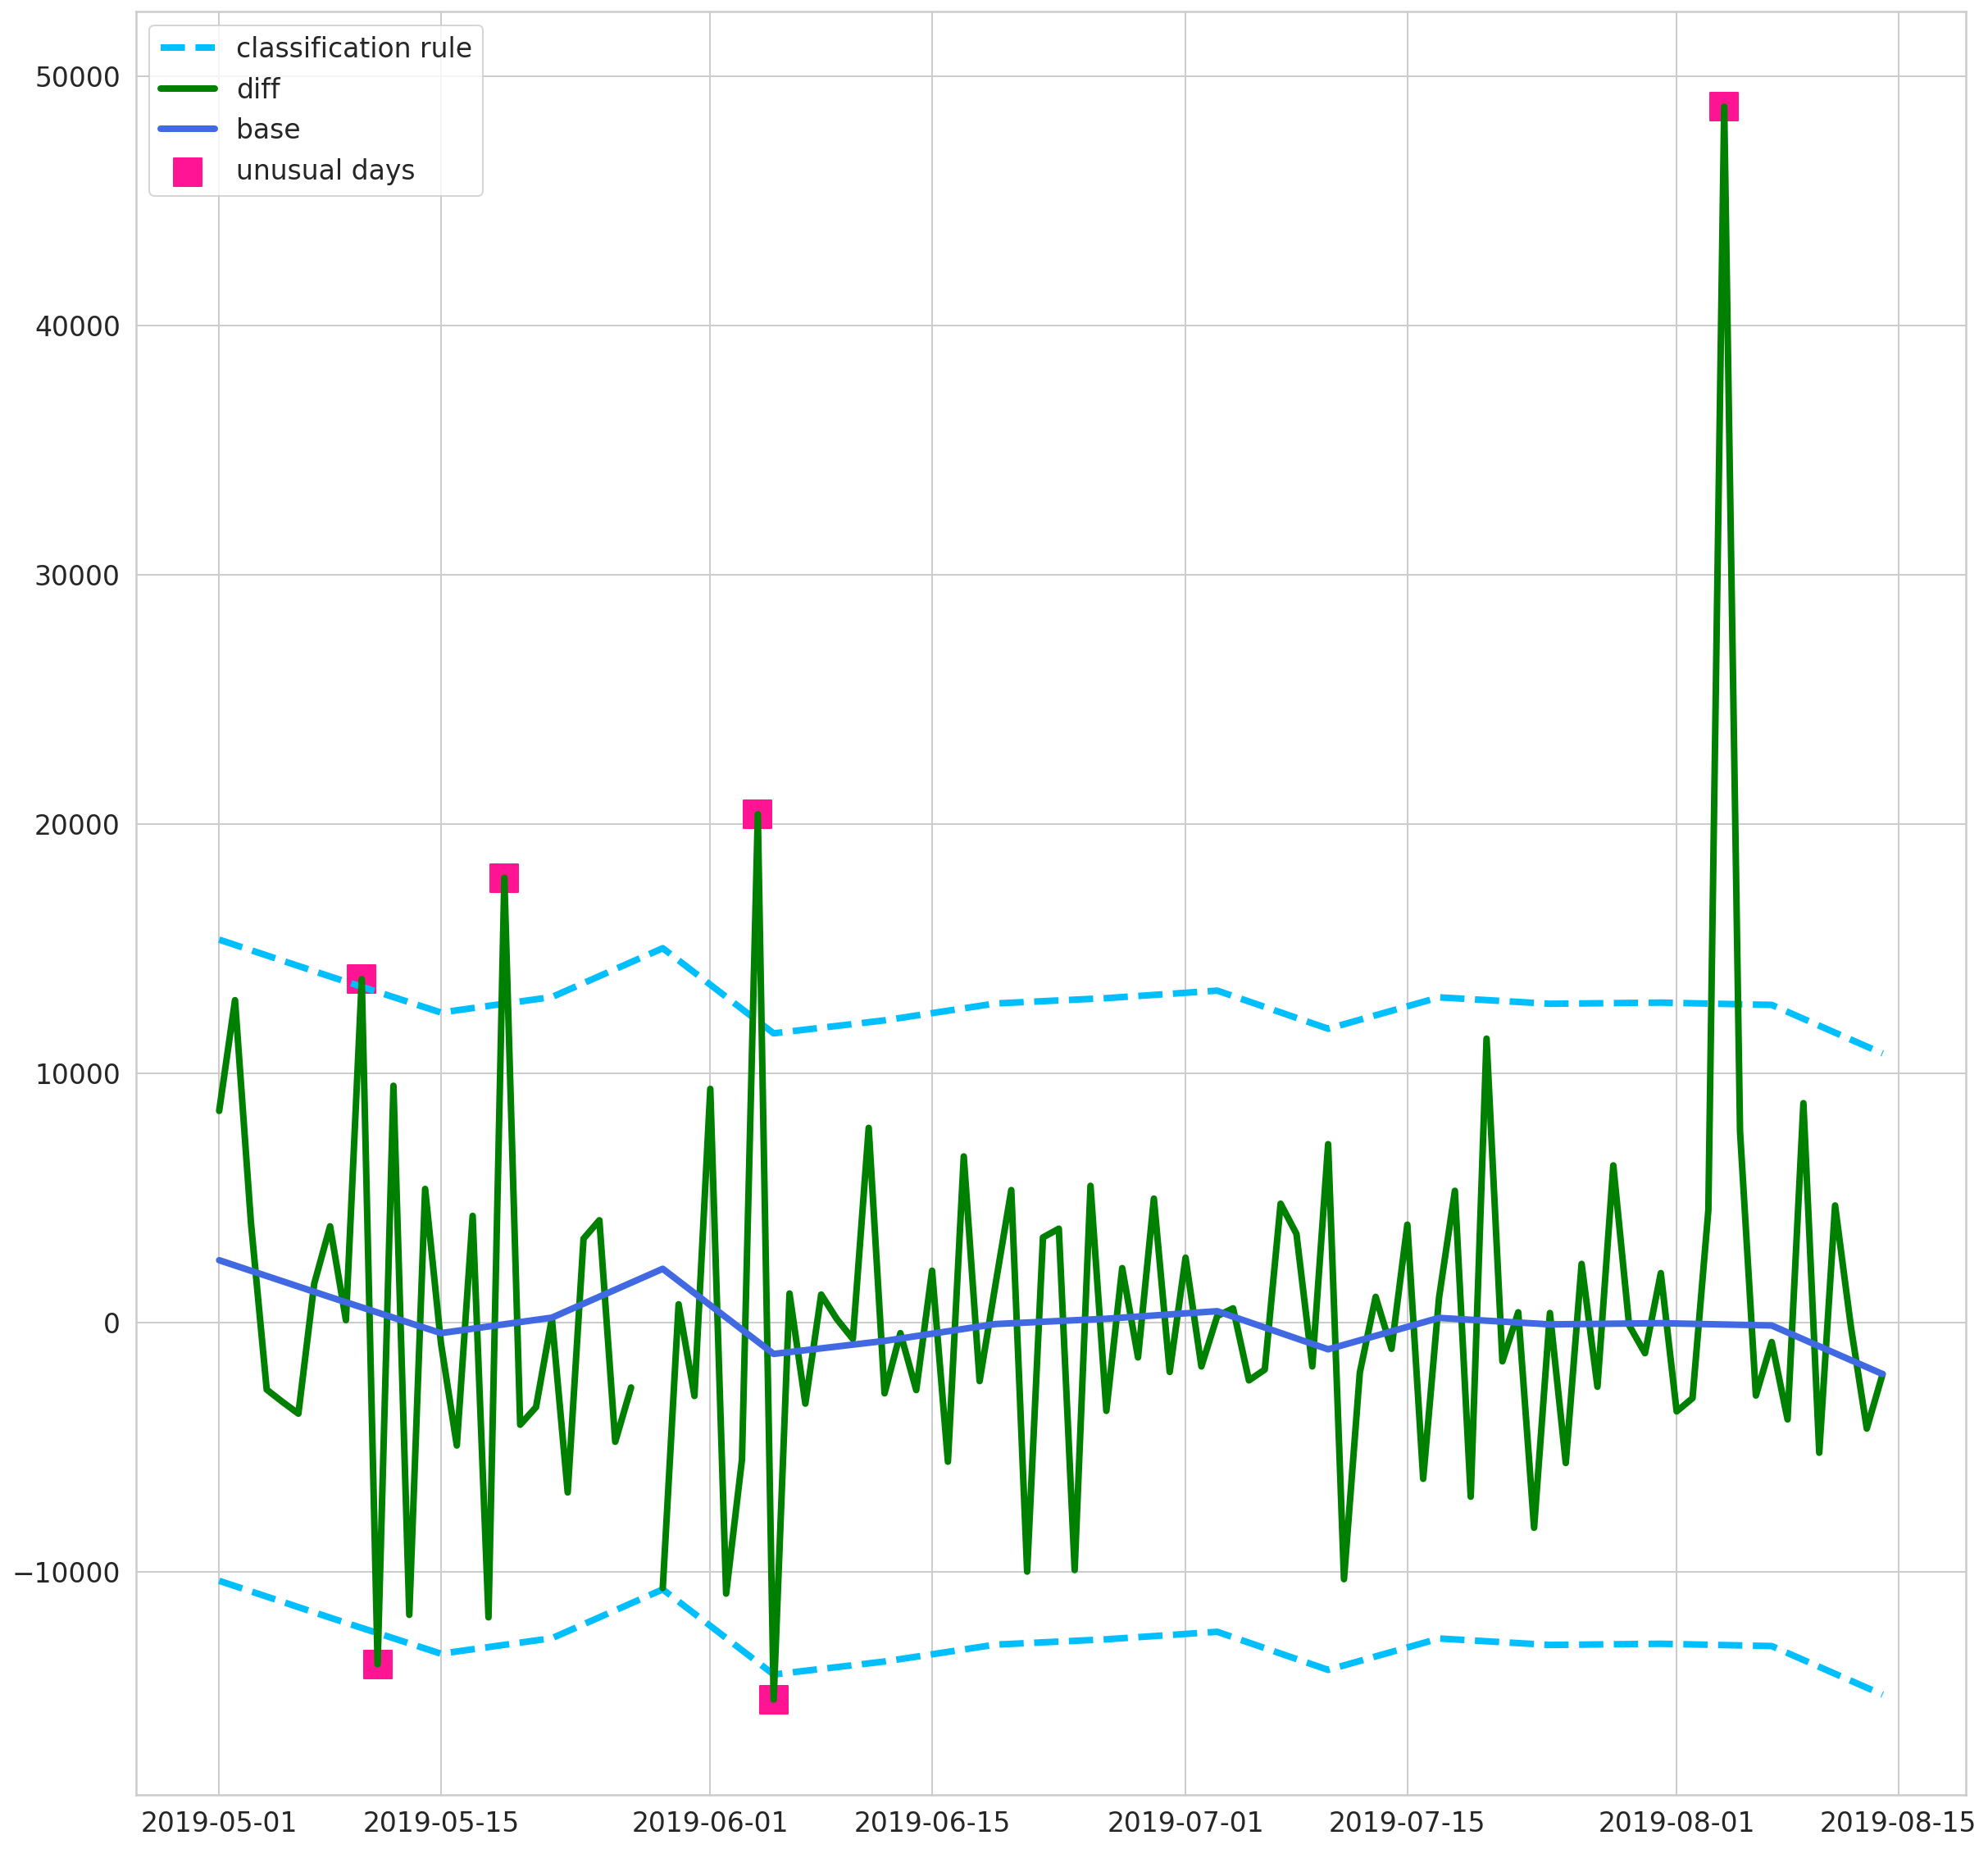

In [165]:
out_T_repl_T = detect_typical_days_pipeline(data, exclude_outliers=True,  replace_empty_mean=True,  draw=True)

In [166]:
# Conclusion:
#
# 1. For real data (not first discrete difference) best p-value is 0.057 with exclude outliers and
#    replace empty data by 0.0 value.
# 2. For first discrete difference series best p-value is 0.092 with exclude outliers and replace empty data 
#    by mean value.
# 3. When outliers is include, p-value does not allow using normal distribution for a rule. In a good way, 
#    we need to use nonparametric statistics methods.
# 4. For real data mean error more then error first discrete difference series, regardless of outliers and 
#    empty data.
# 5. Errors are less for small and big percentiles, and more for central percentiles.
# 6. In real case percentile depends on the personal quality of a person, like the ability to be surprised.   
#    Percentile should not be chosen as the minimum, but come from outside. For our example, the value 0.9
#    means, that peson will no surprise in 90% cases.
# 7. Best value of error is 2.6 when percentile=0.9 and base='mean' with real data, but for first 
#    discrete difference best base in 'avar_7' with value 3.6. When we compare all percentiles,
#    'avar_7' will win.
# 8. Best classificator, for my opinion, is 'avar_7' with first discrete difference series.
# 9. Of course, there are better ways to predict the time series, such as ARIMAX, NN and other.
#    But our task is to predict human feelings, and the person does not remember what happened 
#    to him more than a week ago in detail. 
#    In this regard, I chose models of the moving average (for ordinary people) and the average for the past 
#    period (for athletes, if they pay attention to summarizing indicators for the period).

In [184]:
# Answer:
out_T_repl_T

2019-05-01    True
2019-05-02    True
2019-05-03    True
2019-05-04    True
2019-05-05    True
              ... 
2019-08-10    True
2019-08-11    True
2019-08-12    True
2019-08-13    True
2019-08-14    True
Freq: D, Name: avar_7_0.9_flag, Length: 106, dtype: object